# Predicting Customer Churn for Telco Systems  <a class="tocSkip">

## Notebook 4/4 - Modelling and Evaluation <a class="tocSkip">

by: __Neel Chudasama__

This notebook contains the steps I took to implement modelling techniques that would help make predictions. The processes outlined in this notebook includes defining variables, establishing baseline models, exploring other modelling techniques and the step by step process I took to optimise the hyperparameters of each model.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-Loading-Data" data-toc-modified-id="Importing-Libraries-and-Loading-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries and Loading Data</a></span></li><li><span><a href="#Define-Independent-and-Dependent-Variables" data-toc-modified-id="Define-Independent-and-Dependent-Variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define Independent and Dependent Variables</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train-Test Split</a></span></li></ul></li><li><span><a href="#Baseline-Models" data-toc-modified-id="Baseline-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#K-Nearest-Neighbours" data-toc-modified-id="K-Nearest-Neighbours-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>K-Nearest Neighbours</a></span></li></ul></li><li><span><a href="#Balance-the-Data" data-toc-modified-id="Balance-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Balance the Data</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Optimisation" data-toc-modified-id="Logistic-Regression-Optimisation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression Optimisation</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#K-Nearest-Neighbours" data-toc-modified-id="K-Nearest-Neighbours-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>K-Nearest Neighbours</a></span></li></ul></li><li><span><a href="#Modelling-after-Scaling" data-toc-modified-id="Modelling-after-Scaling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling after Scaling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#K-Nearest-Neighbours" data-toc-modified-id="K-Nearest-Neighbours-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>K-Nearest Neighbours</a></span></li><li><span><a href="#Random-Forest-Modelling" data-toc-modified-id="Random-Forest-Modelling-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Random Forest Modelling</a></span></li><li><span><a href="#Adaboost-Classifier" data-toc-modified-id="Adaboost-Classifier-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Adaboost Classifier</a></span></li><li><span><a href="#XGBOOST-Classifier" data-toc-modified-id="XGBOOST-Classifier-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>XGBOOST Classifier</a></span></li><li><span><a href="#Apriori-Algorithm" data-toc-modified-id="Apriori-Algorithm-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Apriori Algorithm</a></span></li></ul></li><li><span><a href="#Modelling-Summary" data-toc-modified-id="Modelling-Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling Summary</a></span></li><li><span><a href="#Model-Recommendations" data-toc-modified-id="Model-Recommendations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Recommendations</a></span></li><li><span><a href="#Actionable-Insights" data-toc-modified-id="Actionable-Insights-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Actionable Insights</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

## Importing Libraries and Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore', message = 'WARNING')
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message = 'DeprecationWarning')

In [2]:
# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy import stats
import math
import capstone_utils

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
plt.rcParams["figure.dpi"] = 300 # to ensure that plots are not blurry
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import association_rules

In [3]:
import capstone_utils
from importlib import reload
reload(capstone_utils)

<module 'capstone_utils' from '/Users/neelc/Library/CloudStorage/OneDrive-Personal/Documents/Brainstation/Capstone/capstone_utils.py'>

In [4]:
#Loading the data from the pkl file 
telco_df = joblib.load('Data/final_telco_df.pkl')

## Define Independent and Dependent Variables

Before I can conduct any modelling I first need to split the data into a Train and Test set. In machine learning, data splitting is typically done to avoid overfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data. To ensure this doesn't happen my models will only see the train data and then be scored on how well it predicts on the test data.

### Train-Test Split

In [5]:
X = telco_df.drop(columns ='Churn')
y = telco_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify= y)

## Baseline Models

### Logistic Regression

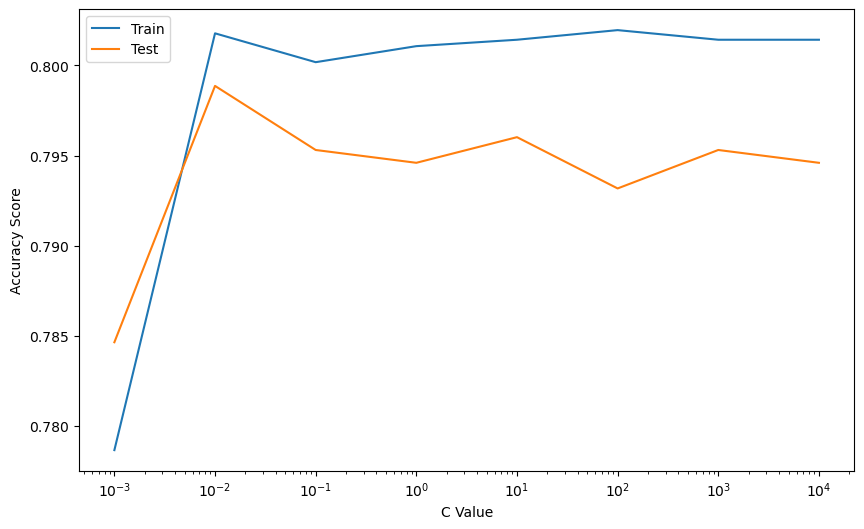

The C value which yielded the highest test accuracy was: 0.01, I will input this in my final model:
Train score: 0.8017777777777778
Test score: 0.798862828713575


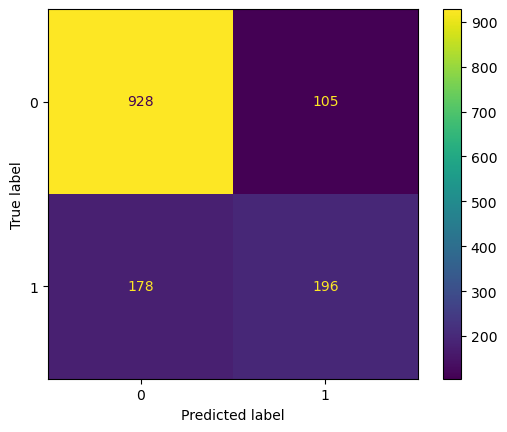

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [6]:
log = capstone_utils.plot_model_result('logistic', X_train, X_test, y_train, y_test)

Looking at the my logistic regression baseline model, I can see that I got a pretty good train and test accuracy score. Both around 80% which shows that I haven't overfitted the data and have still been able to produce a good foundation model. 

However, looking at both the confusion matrix and the classification report I can see that the model did not perform very well. It was very good at correctly predicting the 0 class but performed poorly when predicting class 1. This is compounded by the results in the classification report, with very low percentages for the precision, recall and f1 for class 1. This demonstrates the large imbalance in data which has meant that the models have been able to correctly predict 0 given the ample amount of data but it has not been able to do the same when the class is 1 because it does not have enough data. 

This imbalance will have an effect on the rest of the baseline models and will be kept in mind when studying the results. 

### Decision Tree

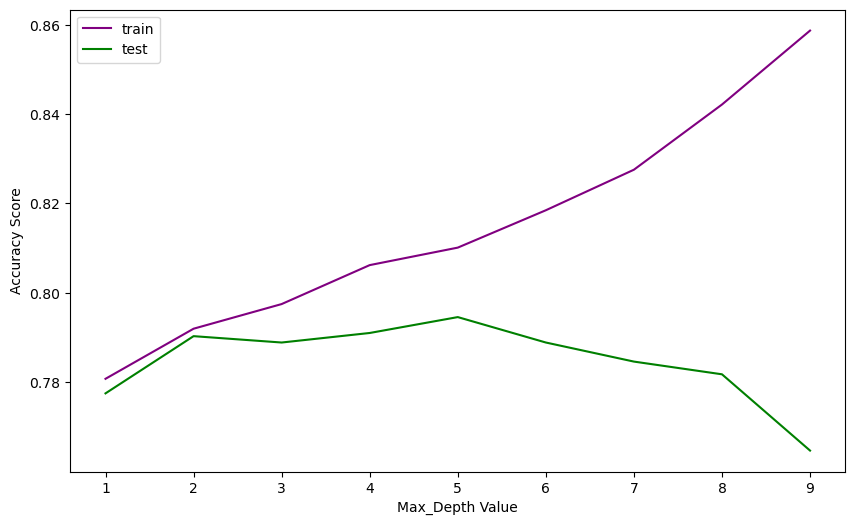

The max depth value which yielded the highest test accuracy was: 5, I will input this in my final model:
Train score: 0.8101333333333334
Test score: 0.7945984363894811


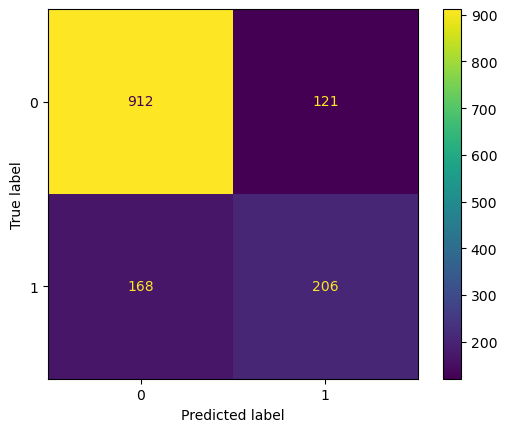

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [7]:
dt = capstone_utils.plot_model_result('decision', X_train, X_test, y_train, y_test)

Studying the graph, the train accuracy starts to increase very quickly after the maximum depth is 5 - this is due to overfitting. I expected the decision tree to have a much higher accuracy than logistic regression as the target variable is binary. However, it seems to have performed slighly worse than logistic. 

As can be seen from the confusion matrix and classification report, the model has been able to predict the class 1 labels slightly better but as a result the class 0 labels have performed much worse. There were more false positive and false negatives which affected the precision and recall score of both classes. 

### K-Nearest Neighbours

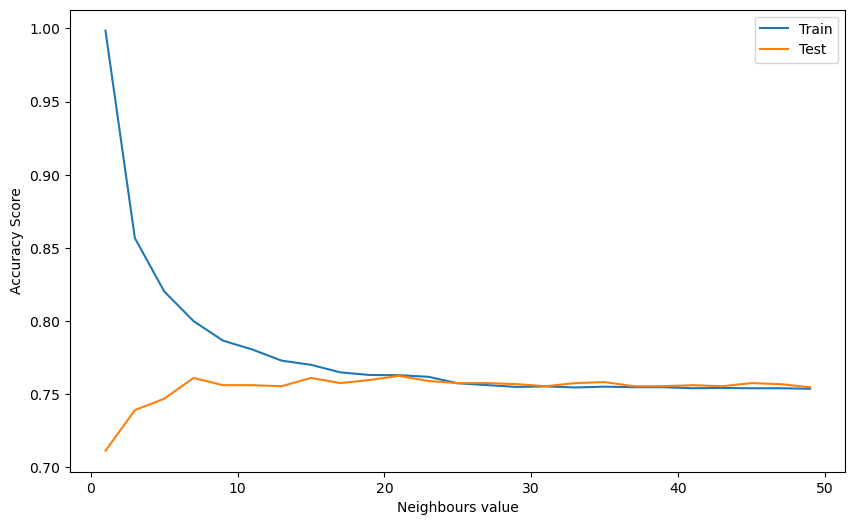

The neighbours value which yielded the highest test accuracy was: 21, I will input this in my final model:
Train score: 0.7630222222222223
Test score: 0.7626154939587776


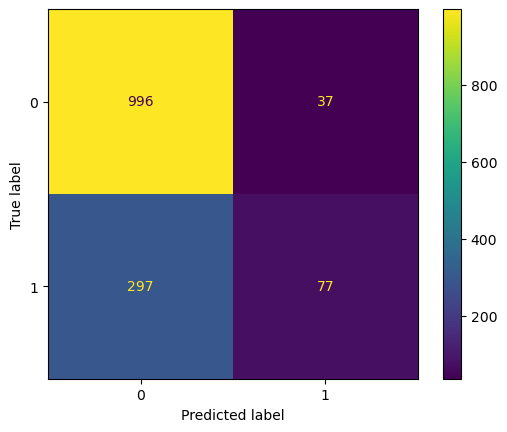

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1033
           1       0.68      0.21      0.32       374

    accuracy                           0.76      1407
   macro avg       0.72      0.59      0.59      1407
weighted avg       0.75      0.76      0.71      1407



In [8]:
knn = capstone_utils.plot_model_result('knearest', X_train, X_test, y_train, y_test)

Out of the three baseline models, KNN surprised me with the least overfitting of the data. From the plot of the train and test accuracy scores the two lines converged demonstrating a lack of overfitting which shows that the performance was slightly above average even though the test accuracy was lower than the previous two models. 

The confusion matrix and classificaiton report demonstrate how poor this model performed. Given that there was an imbalance in data which was skewed to class 0, KNN was able to perform much better at predicting class 0. This is to be expected given the process behind how KNN works. With there being more class 0 datapoints it will be biased towards predicting class 0. However, there is also a tradeoff as it meant that the class 1 value were predicted poorly represent by the poor recall and f1 scores. 

Referring back to my clustering model, the data points were very close together with little seperation - demonstrated by the low silhouette score. This could be a reason as to why the recall score is so low as there were so many data points mixed together for those that churned and those that didn't.

## Balance the Data

After studying the results of the baseline models, I was able to discern that there was a massive imbalance in data which was causing the data to be heavily skewed. Allowing the models to correctly predict one class compared to the other.

In [9]:
display(y_train.value_counts())

0    4130
1    1495
Name: Churn, dtype: int64

As you can see, there is a much larger proportion of class 0 values than class 1 values. This can be detrimental to the modelling phase and therefore must be adjusted to ensure that the data is balanced. I chose to use the SMOTE method of balancing my data. SMOTE aims to balance class distribution by randomly increasing minority class by replicating the minority class' data points.

In [10]:
X_train,y_train = capstone_utils.balance_data(X_train,y_train)

Original train target variable distribution


0    4130
1    1495
Name: Churn, dtype: int64


Resampled train target variable distribution


0    4130
1    4130
Name: Churn, dtype: int64

Now with the help of SMOTE, I have been able to account for the imbalance in class. This will improve the accuracy of my model and allow me to optimise the hyperparameters of the model. 

### Logistic Regression Optimisation

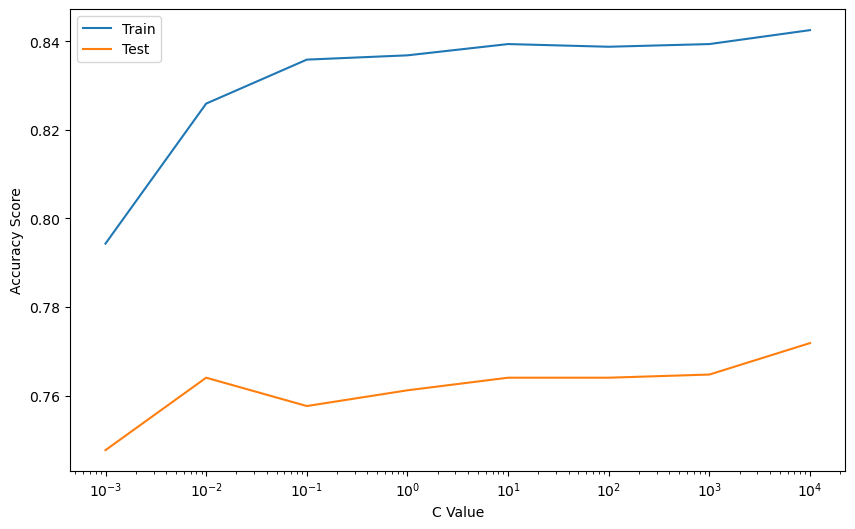

The C value which yielded the highest test accuracy was: 10000, I will input this in my final model:
Train score: 0.8424939467312349
Test score: 0.7718550106609808


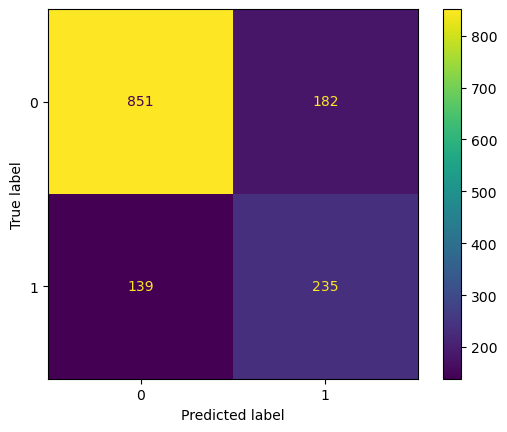

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.63      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



In [11]:
log = capstone_utils.plot_model_result('logistic', X_train, X_test, y_train, y_test)

As can be seen from the classification report, with the help of SMOTE balancing the data - the logistic regression model has operated slightly worse with the test accuracy dropping by 4%. The recall score which is data on all the positive values increased meaning that there was a decrease in the number of false negative outputted by the model - for class 1. This is a positive. Finally, the average f1 score only dropped by 3% which demonstrates the predictive ability of the model has dropped however this can be chalked up to the class imbalance. This model will need adjusting.

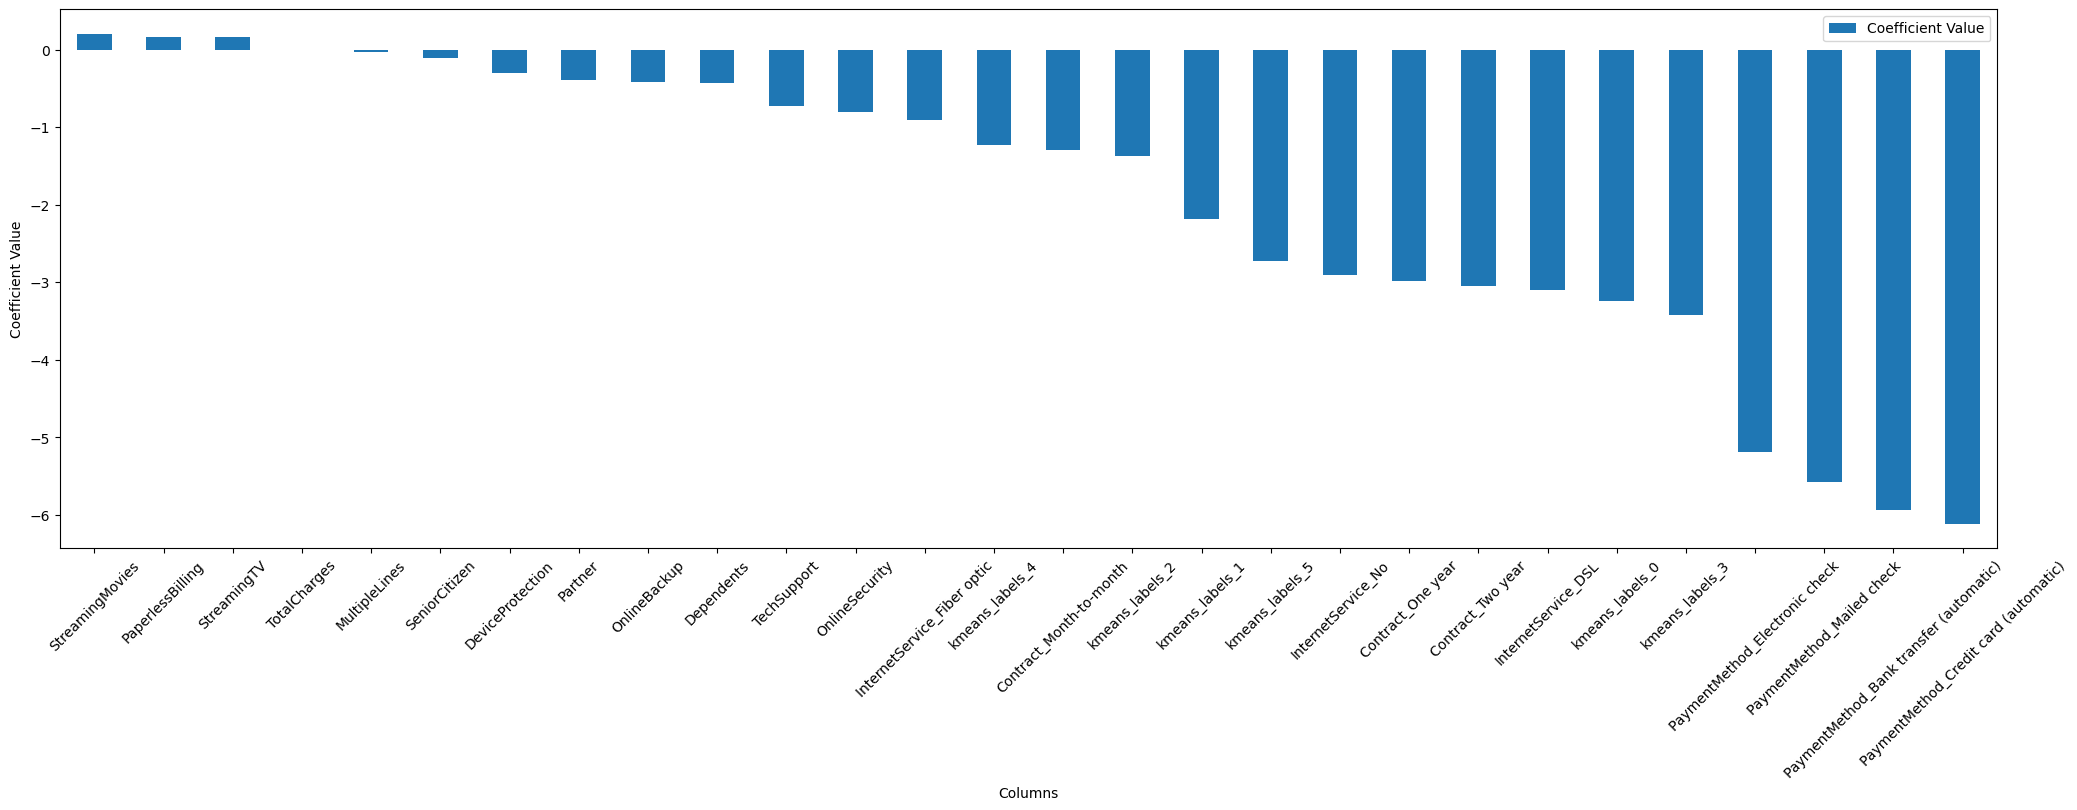

In [12]:
capstone_utils.plot_log_coeff(log,X_train)

Looking at the coefficients for the logistic model there have been some surprising features that help to contribute to whether a customer churns or not. Whether the customer pays with a credit card has an effect on whether they churn which was identified during the EDA process. Furhtermore, during the clustering process it was determined that customers who were in group 1 also helped to determine whether a customer churned. 

On the other hand, features such as StreamingMovies did not have an effect on whether a customer churned or not which was quite surprising given how popular this service was. But this could mean that due to so many customers opting to pay for this service the model has deemed it as statistically insignificant. Both streamingTV and StreamingMovies features performed very similar which was also expected as customers tended to pay for both services.

### Decision Tree

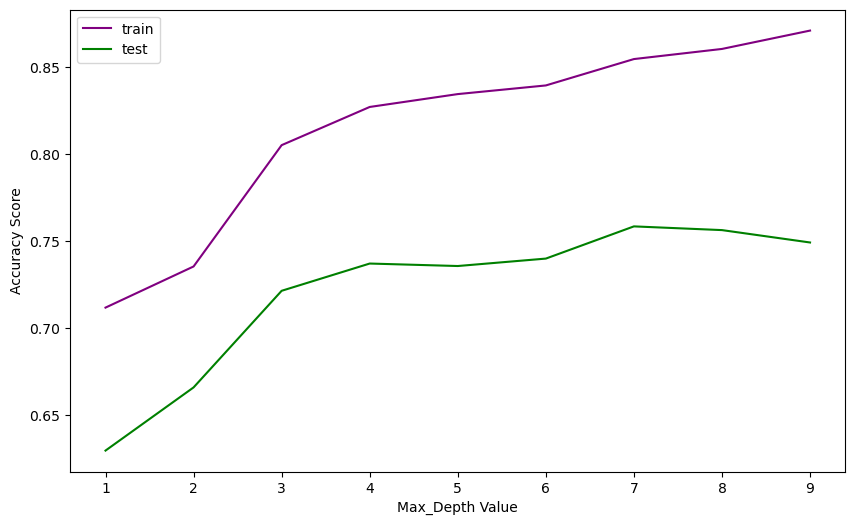

The max depth value which yielded the highest test accuracy was: 7, I will input this in my final model:
Train score: 0.8542372881355932
Test score: 0.7590618336886994


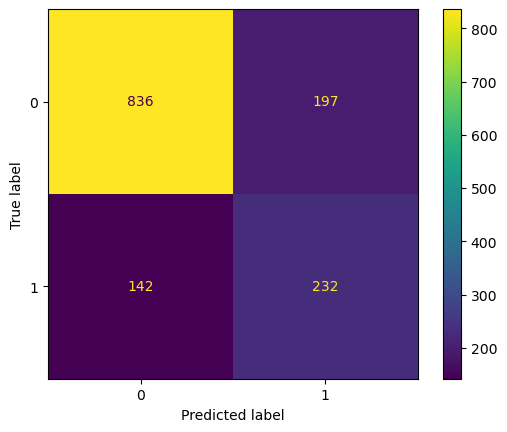

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1033
           1       0.54      0.62      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.76      1407



In [13]:
dt = capstone_utils.plot_model_result('decision', X_train, X_test, y_train, y_test)

After balancing again there seems to be a drop in performance of the data, there is a disparity between the accuracy scores of the test and train data which would imply that the model is overfitting to the train data quite heavily. 

Again the same performance scores are demonstrated with the class 1 values, The precision dropped meaning there is an increase in the number of false positive and there was an increase in the amount of correctly predicted true positives, demonstrated by the recall score. The overall f1 score dropped by 3% but this is still fairly good at predicting values.

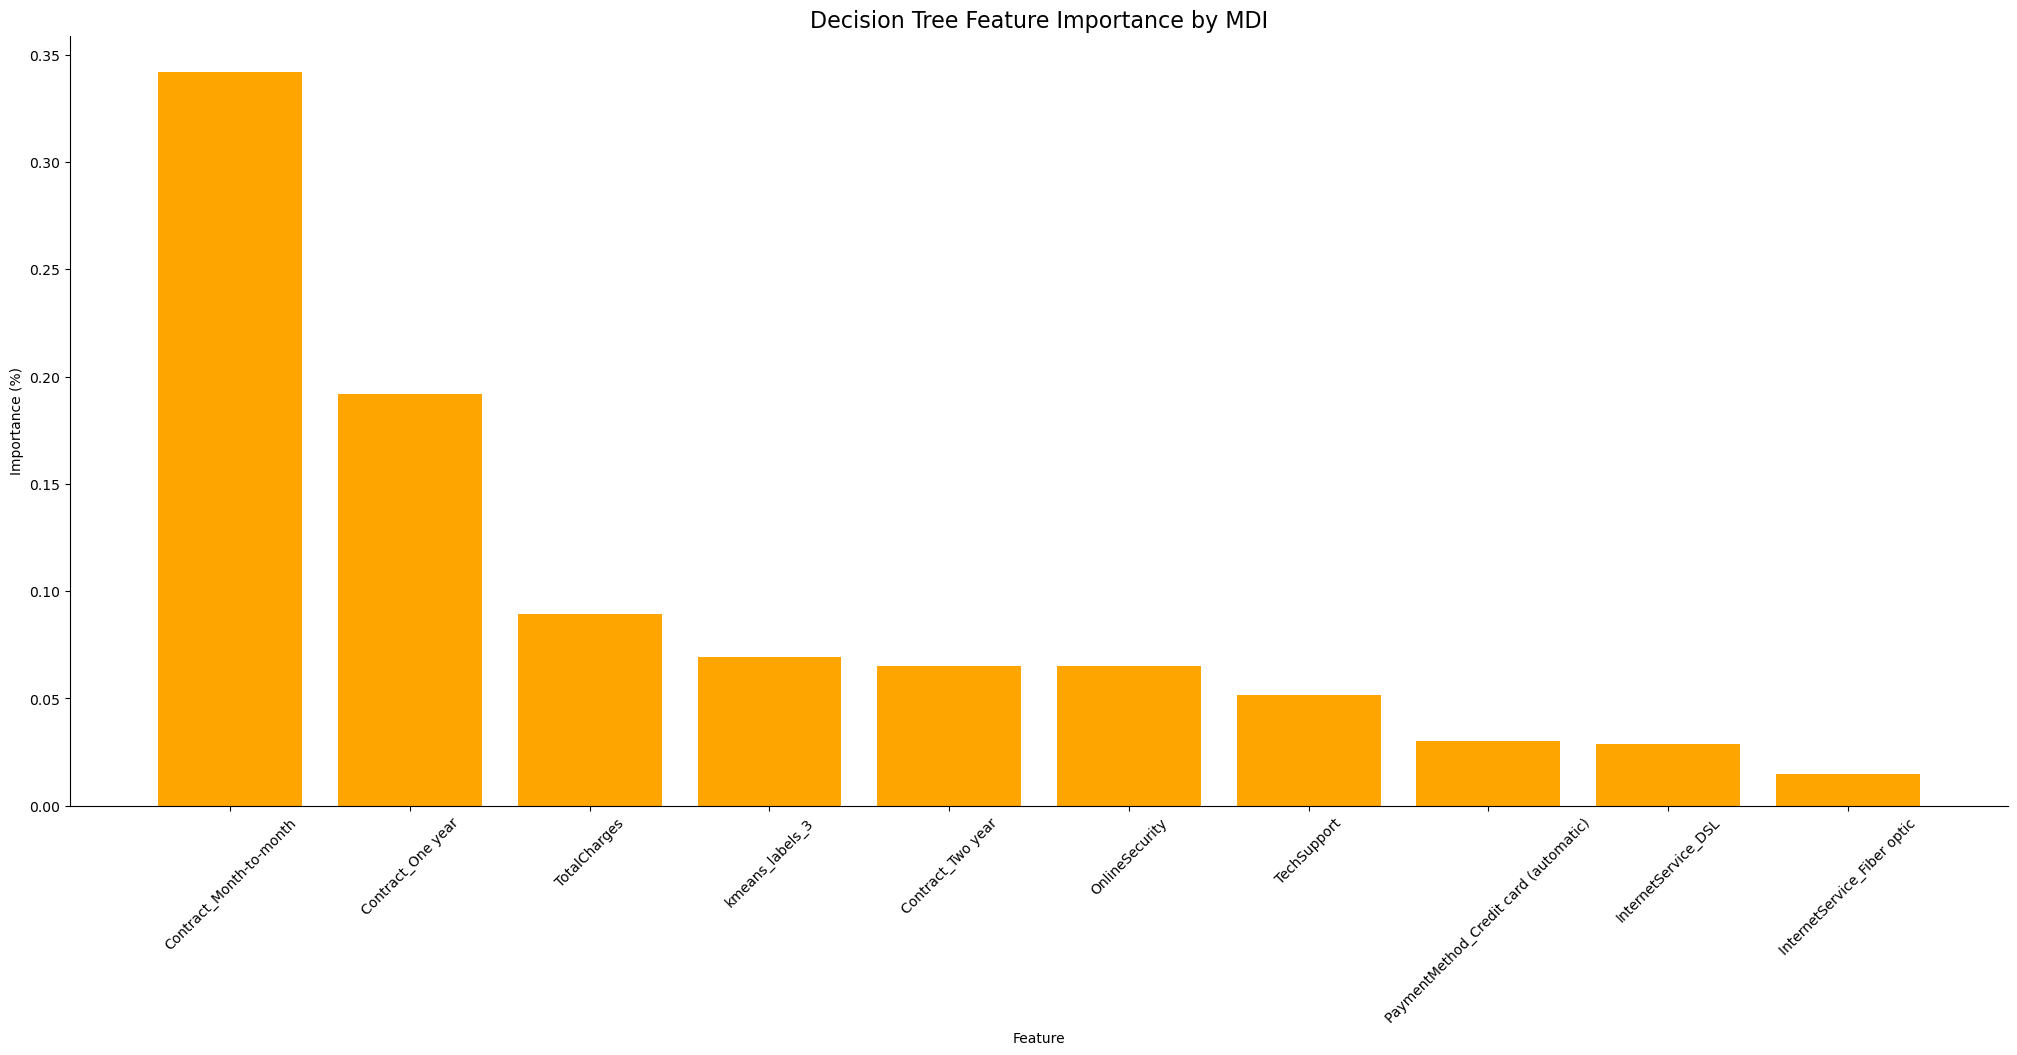

In [14]:
capstone_utils.decision_tree_feature_importance(dt,X_train)

After balancing the data, the top 10 features which the model has deemed to be important are quite illuminating. To see that both one year contracts and month to month are very interesting. I identified very high churn behaviour during my EDA with both these features so that makes sense. However, features I previously thought as quite irrelevant are seen as important such as TechSupport. This is very interesting are may be working in tandem with Fiber optic to help split customers. 

### K-Nearest Neighbours

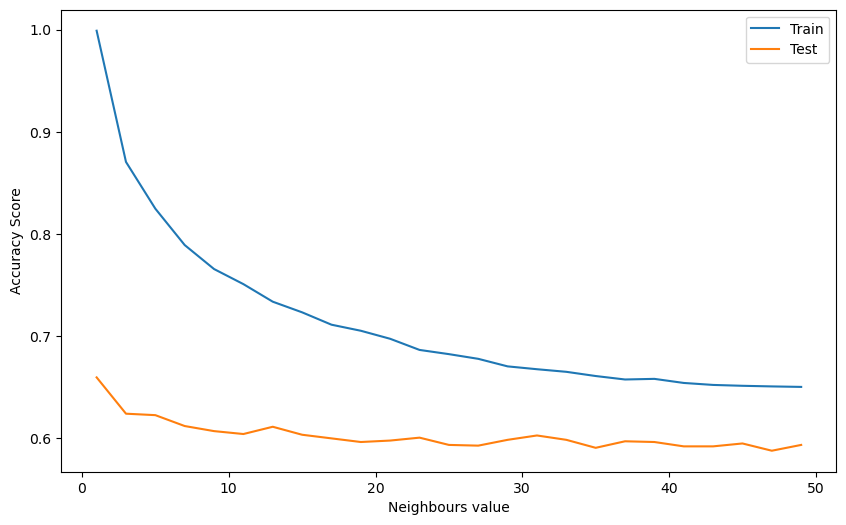

The neighbours value which yielded the highest test accuracy was: 1, I will input this in my final model:
Train score: 0.998910411622276
Test score: 0.6595593461265103


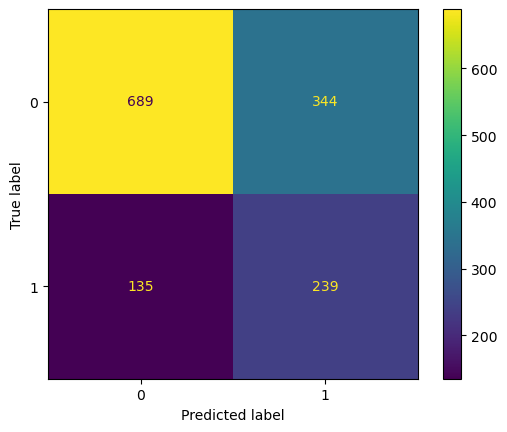

              precision    recall  f1-score   support

           0       0.84      0.67      0.74      1033
           1       0.41      0.64      0.50       374

    accuracy                           0.66      1407
   macro avg       0.62      0.65      0.62      1407
weighted avg       0.72      0.66      0.68      1407



In [15]:
knn = capstone_utils.plot_model_result('knearest', X_train, X_test, y_train, y_test)

The KNN model has performed much worse after balancing the data - because SMOTE adds artifical data to balance the class this causes bias. As the new data points are generated from the original data points there is very little variance in the data and the data points will be similar to the old ones. This will cause a skew in predictions of the data due to the bias. So when KNN looks at the neighbours of the data set it may be affected by biased data points which is producing a high number of false negatives and positives. 

Furthermore, the data has not been scaled which is effecting the performance of all the models as there is binary data in some columns but the TotalCharges column has data ranging as high as 8000. This will affect the model performance drastically as it means that the model can learn and understand the problem easier


## Modelling after Scaling

As mentioned previously, the data in this dataframe has a large amount of variance. Some columns can range up to 8000 while others columns are binarised with a maximum value of 1. This can minimise the importance of some columns due to the fact that there are such massive values, hence the need for scaling.

In [16]:
X_train_mm, X_test_mm = capstone_utils.minmax_scale_data(X_train,X_test)

During the EDA process in Notebook 2 - the histograms of all the numeric columns which were not binarised had distributions that were not normally distributed. Therefore, I have chosen to use a minmax scaler it can perform better than the standard scaler when your features have non-normal distributions. A minmax scaler is not distorting the actual distribution of the features, instead it is just reducing the range to be between 0 and 1, which helps when I have features of different dimensions which distort the performance of the model. 

### Logistic Regression

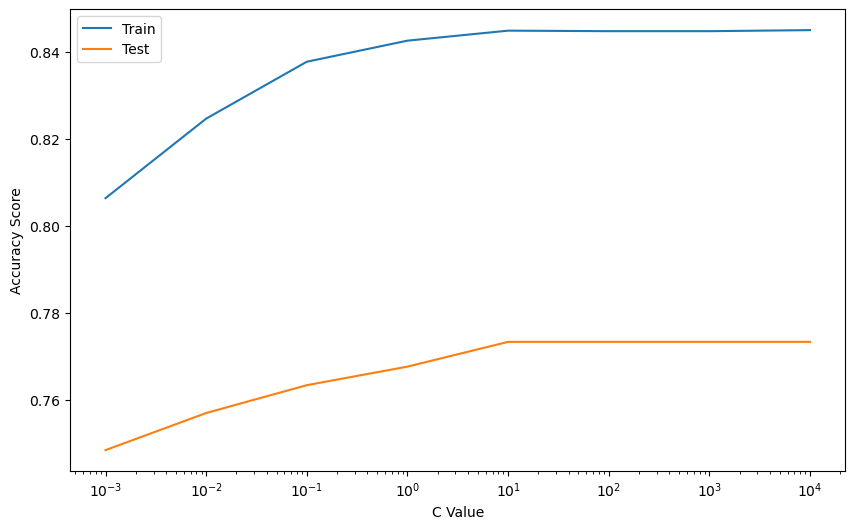

The C value which yielded the highest test accuracy was: 10, I will input this in my final model:
Train score: 0.8447941888619854
Test score: 0.7732764747690121


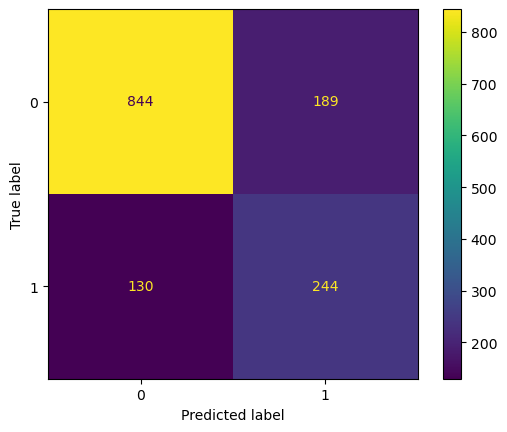

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1033
           1       0.56      0.65      0.60       374

    accuracy                           0.77      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.77      0.78      1407



In [17]:
log = capstone_utils.plot_model_result('logistic', X_train_mm, X_test_mm, y_train, y_test)

Minmax scaler helped to increase the scores slightly of each class as well as the overall score of the whole model for predictions. However, I want to explore this further to see if I can optimise this model. 

With the use of the GridSearch function, I will now optimise the hyperparameters of the model to see if I can increase the accuracy of my model. 

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique and for the following gridsearches I chose a cv value 5. It is common practice to conduct a 5 fold cross validation as this ensures that 20% of the data is left for the test data to ensure that the most amount of data is allowed for training the model.  

The reasoning why I chose each hyperparameter will be discussed below: 

Solver - I chose to use only the 'liblinear' and 'lbfgs' solvers. I had a fairly small dataset which contained only around 8000 rows and it was found that both these solvers work well with small datasets compared with 'sag' and 'saga' which work faster with larger datasets. Furthermore, given that my problem was not a multiclass problem - I did not see the need to include 'newton-cg', 'sag' and 'saga' as these were built to handle multiclass problems and could handle multinomial loss much easier.

Penalty - Certain penalties work with certain solvers so I had to choose which ones I wanted to use carefully. Given that I was only going to use 'liblinear' and 'lbfgs' solvers, the only penalties I could implement were l1,l2 and none. The two penalties help to reduce overfitting by implementing penalties on the datapoints, l1 limits the size of the coefficients as demonstrated earlier some coefficients have more of a weight than others which is why I want to use this. Meanwhile, l2 equals to the square of the magnitude of the coefficients which is also something I would like to explore.

C value (regularization strength) - This C value works with the penalty value to ensure that overfitting does not occur. A high value of C will give more weight to the trianing data which has its problems as it could lead to overfitting of the training data. Meanwhile, a low value of C will give more weight to complex models at the cost of fitting the data. 

Multi_class - Given that this is a binary problem, I have decided to choose 'ovr' as the variable as this would help the model to fit to the data better. 'multinomial' handles multi class problems better which is I felt was unneccessary for my project given this is a binary class problem.

In [18]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', LogisticRegression())], memory=cachedir)
c_values = [.001, .1, 1, 10, 100, 1000]


logreg_param_grid = [
    
    {'model': [LogisticRegression(solver = 'liblinear', multi_class= 'ovr', penalty='l1', random_state=1, class_weight = 'balanced', max_iter = 10000)],
     'model__C': c_values},
    
    {'model': [LogisticRegression(solver = 'liblinear', multi_class= 'ovr', penalty='l2', random_state=1, class_weight = 'balanced',max_iter = 10000)],
     'model__C': c_values},

    {'model': [LogisticRegression(solver = 'liblinear', multi_class= 'ovr', penalty='none', random_state=1, class_weight = 'balanced',max_iter = 10000)],
     'model__C': c_values},
    
    {'model': [LogisticRegression(solver='lbfgs', multi_class= 'ovr', penalty = 'l2', random_state=1, class_weight = 'balanced',max_iter = 10000)],
     'model__C': c_values},

    {'model': [LogisticRegression(solver='lbfgs', multi_class= 'ovr', penalty = 'none', random_state=1, class_weight = 'balanced',max_iter = 10000)],
     'model__C': c_values}
     
]

logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, verbose=2)
fitted_logreg_gs = logreg_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END model=LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr',
                   penalty='l1', random_state=1, solver='liblinear'), model__C=0.001; total time=   0.0s
[CV] END model=LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr',
                   penalty='l1', random_state=1, solver='liblinear'), model__C=0.001; total time=   0.0s
[CV] END model=LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr',
                   penalty='l1', random_state=1, solver='liblinear'), model__C=0.001; total time=   0.0s
[CV] END model=LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr',
                   penalty='l1', random_state=1, solver='liblinear'), model__C=0.001; total time=   0.0s
[CV] END model=LogisticRegression(class_weight='balanced', max_iter=10000, multi_class='ovr',
                   penalty='l1', random_state=1,

In [19]:
log_model = fitted_logreg_gs.best_estimator_[-1]

In [20]:
capstone_utils.print_scores(fitted_logreg_gs, X_test_mm,y_test)

The parameters for the best estimator is: 
{'C': 1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
The score for the test data :
0.767590618336887
The best score from the cross validation fitting :
0.8266343825665861


Given that the best model from the gridsearch had a C value around 1, I want to explore this to see if I can optimise the C value so I will input a pipeline around that value.

In [21]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', log_model)], memory=cachedir)
c_values = list(np.arange(0.5,1.5,0.1))

 

logreg_param_grid = [
    {
     'model': [log_model],
     'model__C': c_values}
]

logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, verbose=2)
fitted_logreg_gs = logreg_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model=LogisticRegression(C=1, class_weight='balanced', max_iter=10000,
                   multi_class='ovr', random_state=1), model__C=0.5; total time=   0.1s
[CV] END model=LogisticRegression(C=1, class_weight='balanced', max_iter=10000,
                   multi_class='ovr', random_state=1), model__C=0.5; total time=   0.1s
[CV] END model=LogisticRegression(C=1, class_weight='balanced', max_iter=10000,
                   multi_class='ovr', random_state=1), model__C=0.5; total time=   0.1s
[CV] END model=LogisticRegression(C=1, class_weight='balanced', max_iter=10000,
                   multi_class='ovr', random_state=1), model__C=0.5; total time=   0.1s
[CV] END model=LogisticRegression(C=1, class_weight='balanced', max_iter=10000,
                   multi_class='ovr', random_state=1), model__C=0.5; total time=   0.1s
[CV] END model=LogisticRegression(C=1, class_weight='balanced', max_iter=10000,
                   

In [22]:
capstone_utils.print_scores(fitted_logreg_gs, X_test_mm,y_test)

The parameters for the best estimator is: 
{'C': 0.9999999999999999, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
The score for the test data :
0.767590618336887
The best score from the cross validation fitting :
0.8266343825665861


In [23]:
log_model = fitted_logreg_gs.best_estimator_[-1]

With the help of pipelines, I have been able to optimise the hyperparameters of the logistic regression model and increase the score on the test data by 0.2% which is a slight increase in performance of the model. This was done by optimising the value of the C.

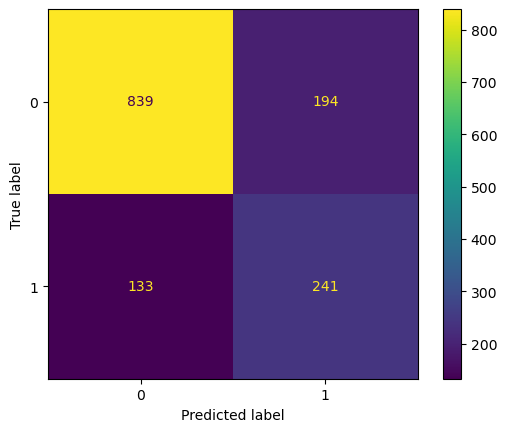

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [24]:
capstone_utils.display_confusion_matrix(log_model,X_test_mm,y_test)

After optimisation it can be seen that the accuracy of the model has dropped slightly, the recall score of both classes dropped by 1%. However, the average f1 score of the model remained the same. If I had more time I would be able to explore modelling further and utilise more parameters. However, the class imbalance in the test data is limiting the model from increasing the score as much as possible.

I want to explore the features that my final model determines as important to see if they differ from previous models:

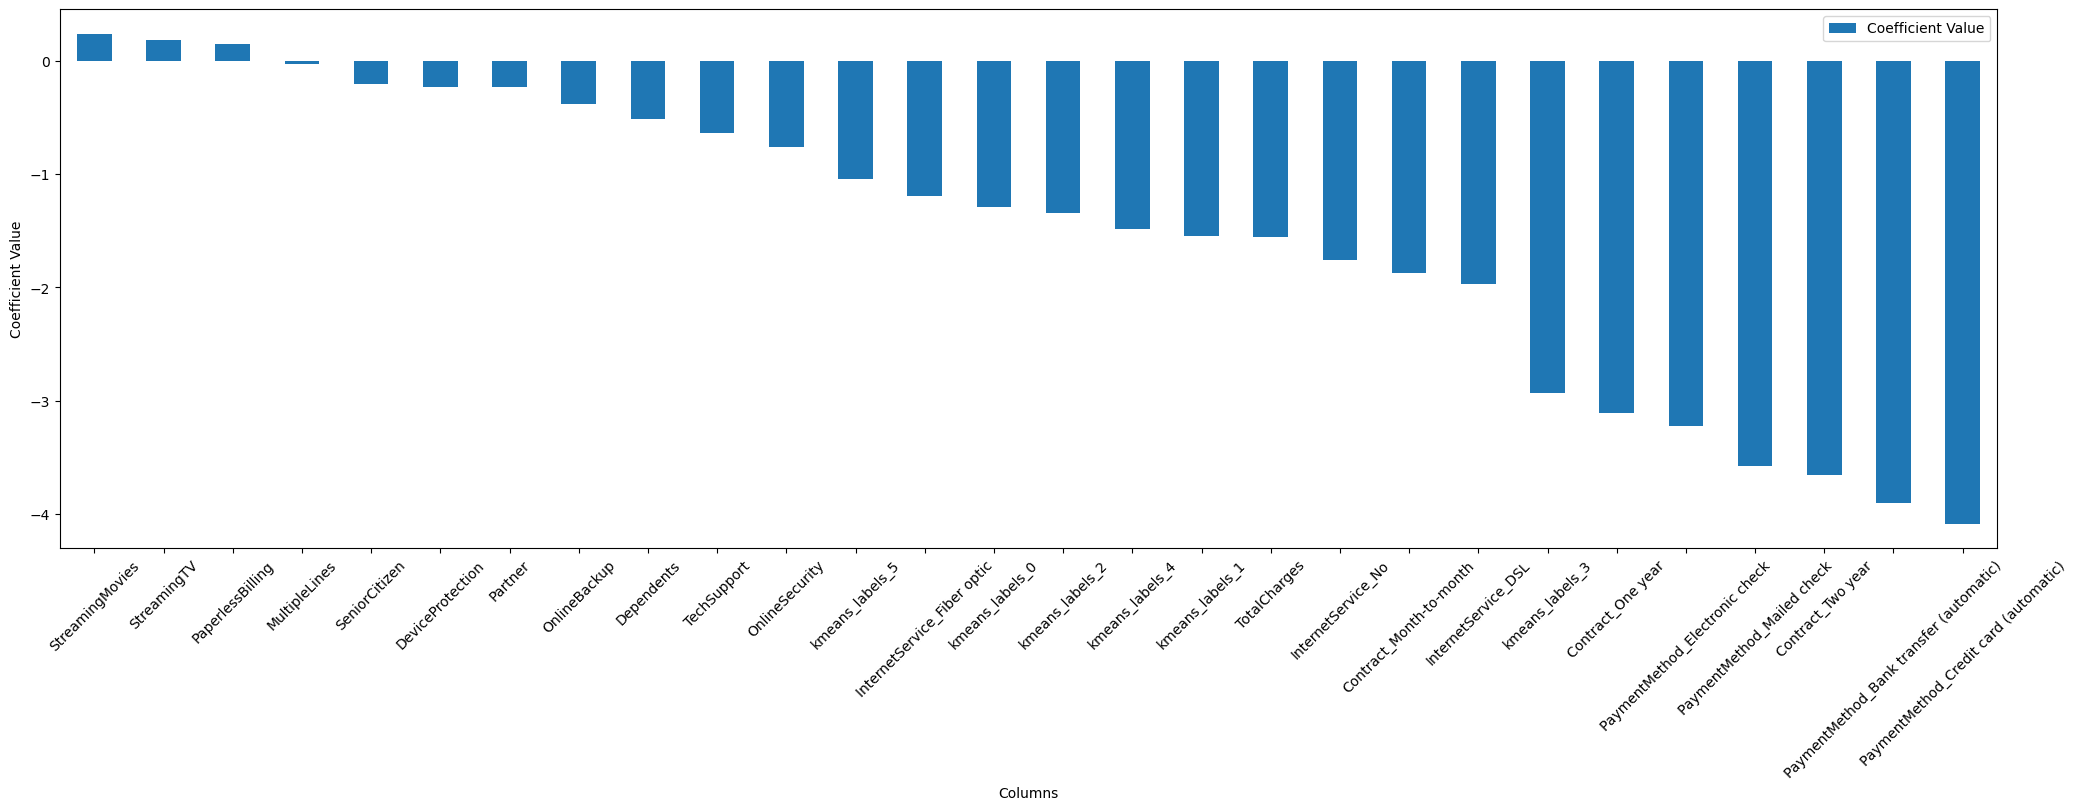

In [25]:
capstone_utils.plot_log_coeff(log_model,X_train)

Looking at the coefficients for the features of the final logistic model, it seems that there has been no change in importance of the features. Payment by credit card seems to have high importance in the model which was seen from the high churn behaviour in Notebook 2. Furthermore, contract_two_year also has high importance becuase those customers who had two year contracts did not churn at a high rate. The payment method of bank transfer seems to have high importance which is very suprising because my during my EDA customers who payed via bank transfer did not exhibit high churn behaviour. This could be the inverse, that customers who pay via bank transfer are a good indicator of customers who did not churn. 

### Decision Tree

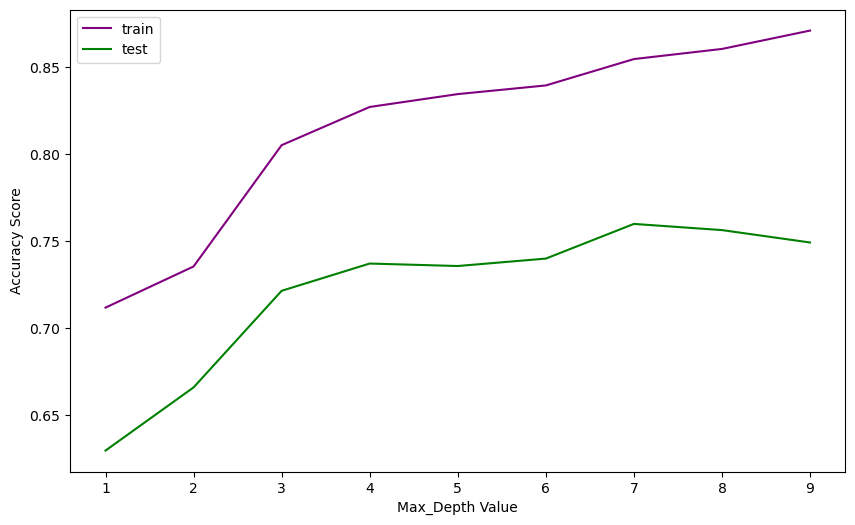

The max depth value which yielded the highest test accuracy was: 7, I will input this in my final model:
Train score: 0.8543583535108958
Test score: 0.759772565742715


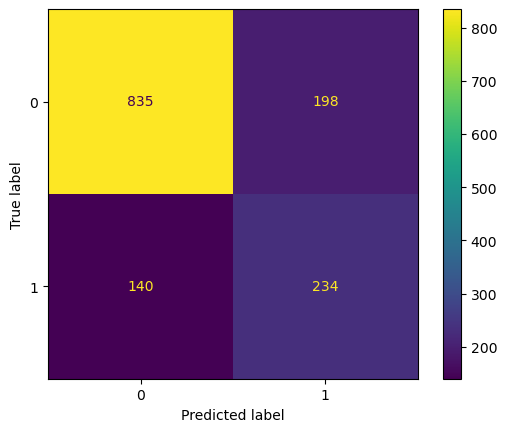

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.76      1407



In [26]:
dt = capstone_utils.plot_model_result('decision', X_train_mm, X_test_mm, y_train, y_test)

Again, my baseline decision tree model is very good at predicting class 1 values but performs much worse with class 0. As identified earlier this could be due to the class imbalance in the test data.

For the decision tree, with external [research](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680) I chose these set of parameters to hypertune my model: 

Max_depth - This refers to the depth of the tree, if the value is set to None then the decision tree will continually split the data until all leaves are pure or until all leaves contain less than a min_sample value. I chose a large range given that I have around 30 features so I wanted the max_depth to be larger than this.

Criterion - This variable determines how the node in a decision tree splits. Both the Gini and entropy variables measure and implement the level of impurity at each node in two different ways. From my external [research](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf) - the agree/disagreement of the Gini Index and the Information Gain was only 2% of all cases, so I chose to use both to see if there were any discrepancies in results. Gini would be better in my case given that my data is binary, meanwhile entropy would perform worse.

Splitter - This is the method used for the split at the node, by default the split is best. The model takes the feature with the highest importance of split from and then breaks down the samples concurrently. I decided to see if the random splitter helped the model to operate more efficiently - this method tells the model to take the feature randomly but with the same distribution. If used with the 'gini' criteria, it will have an importance of 38% so it will be taken in 38% of cases. 

Max_features - I chose 'log2' as the max_features option because I found that the decision tree model was overfitting to the training model. Furthermore, through previous iterations of the grid search it took a very long time to run and it was highly computationally expensive. By choosing this variable this would overcome the computational problem as it means that the model looks at a reduced amount of features to choose and split the samples from. 

Min_samples_leaf - This variable guarantees a certain number of samples in a leaf, I decided to tune this hyperparameter but not min_samples_split as I thought that it was redundant to tune the split variable as I had already defined the max_depth value. However, the min_samples_leaf value was defined because I wanted to reduce overfitting to the training data by ensuring that there was more than one sample at each leaf. I saw that there was overfitting in the train/test accuracy plot so I wanted to ensure that I could get overcome that. Given that I have over 8000 samples of data I have chosen the value of 1000 and a large step size to conserve computing power. 

In [27]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', DecisionTreeClassifier())], memory=cachedir)

decision_param_grid = [
    {'model': [DecisionTreeClassifier(max_features = 'log2')],
    'model__max_depth': [i for i in range(1,40,5)],
    'model__criterion': ['gini','entropy'],
    'model__splitter': ['best','random'],
    'model__min_samples_leaf': [y for y in range(1,1000,50)]
    }
]

decision_gs = GridSearchCV(my_pipeline, param_grid=decision_param_grid, cv=5, verbose=2)
fitted_decision_gs = decision_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] END model=DecisionTreeClassifier(max_features='log2'), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__splitter=best; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_features='log2'), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__splitter=best; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_features='log2'), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__splitter=best; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_features='log2'), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__splitter=best; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_features='log2'), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__splitter=best; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_features='log2'), model__criterion=gini

In [28]:
capstone_utils.print_scores(fitted_decision_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
The score for the test data :
0.7199715707178393
The best score from the cross validation fitting :
0.8072639225181598


In [29]:
dt_model = fitted_decision_gs.best_estimator_[-1]

Given that the parameters for the inital grid search had large steps in the ranges that were applied. I want to narrow down the most optimal parameters. These parameters include - max_depth, and min_samples_leaf, I want to see what the final most optimal model is.

In [30]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', dt_model)], memory=cachedir)

decision_param_grid = [
    {'model': [dt_model],
    'model__max_depth':[i for i in range(8,20)],
    'model__min_samples_leaf': [y for y in range(1,51)]
    }
]

decision_gs = GridSearchCV(my_pipeline, param_grid=decision_param_grid, cv=5, verbose=2)
fitted_decision_gs = decision_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] END model=DecisionTreeClassifier(max_depth=11, max_features='log2'), model__max_depth=8, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_depth=11, max_features='log2'), model__max_depth=8, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_depth=11, max_features='log2'), model__max_depth=8, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_depth=11, max_features='log2'), model__max_depth=8, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_depth=11, max_features='log2'), model__max_depth=8, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_depth=11, max_features='log2'), model__max_depth=8, model__min_samples_leaf=2; total time=   0.0s
[CV] END model=DecisionTreeClassifier(max_depth=11, max_features='log2'), model__max_depth=8, mo

In [31]:
dt_model = fitted_decision_gs.best_estimator_[-1]

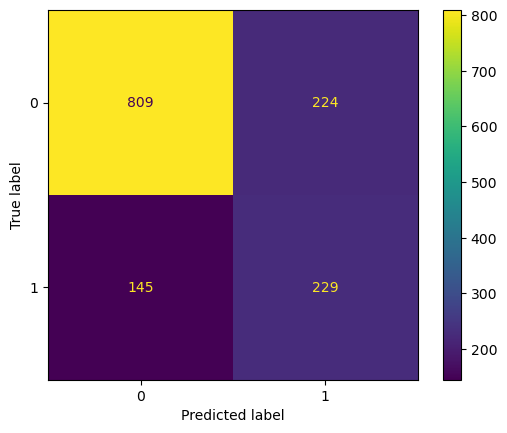

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1033
           1       0.51      0.61      0.55       374

    accuracy                           0.74      1407
   macro avg       0.68      0.70      0.68      1407
weighted avg       0.76      0.74      0.75      1407



In [32]:
capstone_utils.display_confusion_matrix(dt_model,X_test_mm,y_test)

In [33]:
capstone_utils.print_scores(fitted_decision_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 17, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
The score for the test data :
0.7377398720682303
The best score from the cross validation fitting :
0.8213075060532689


I can see that I was able to increase the score on my test data by 0.3% from the previous grid search. However, the average f1 score of the model dropped by 2% - I feel this that this may have been due to the fact that the model has overfitted to the training data more than the test data. If I had further time and then I would explore the max_depth and min_samples_leaf as I feel both that the optimal values of both could be much higher than previously explored. Especially the min_samples_leaf value, however, given the computing time it took to run the current gridsearch and the time constraint of this project I chose not to. 

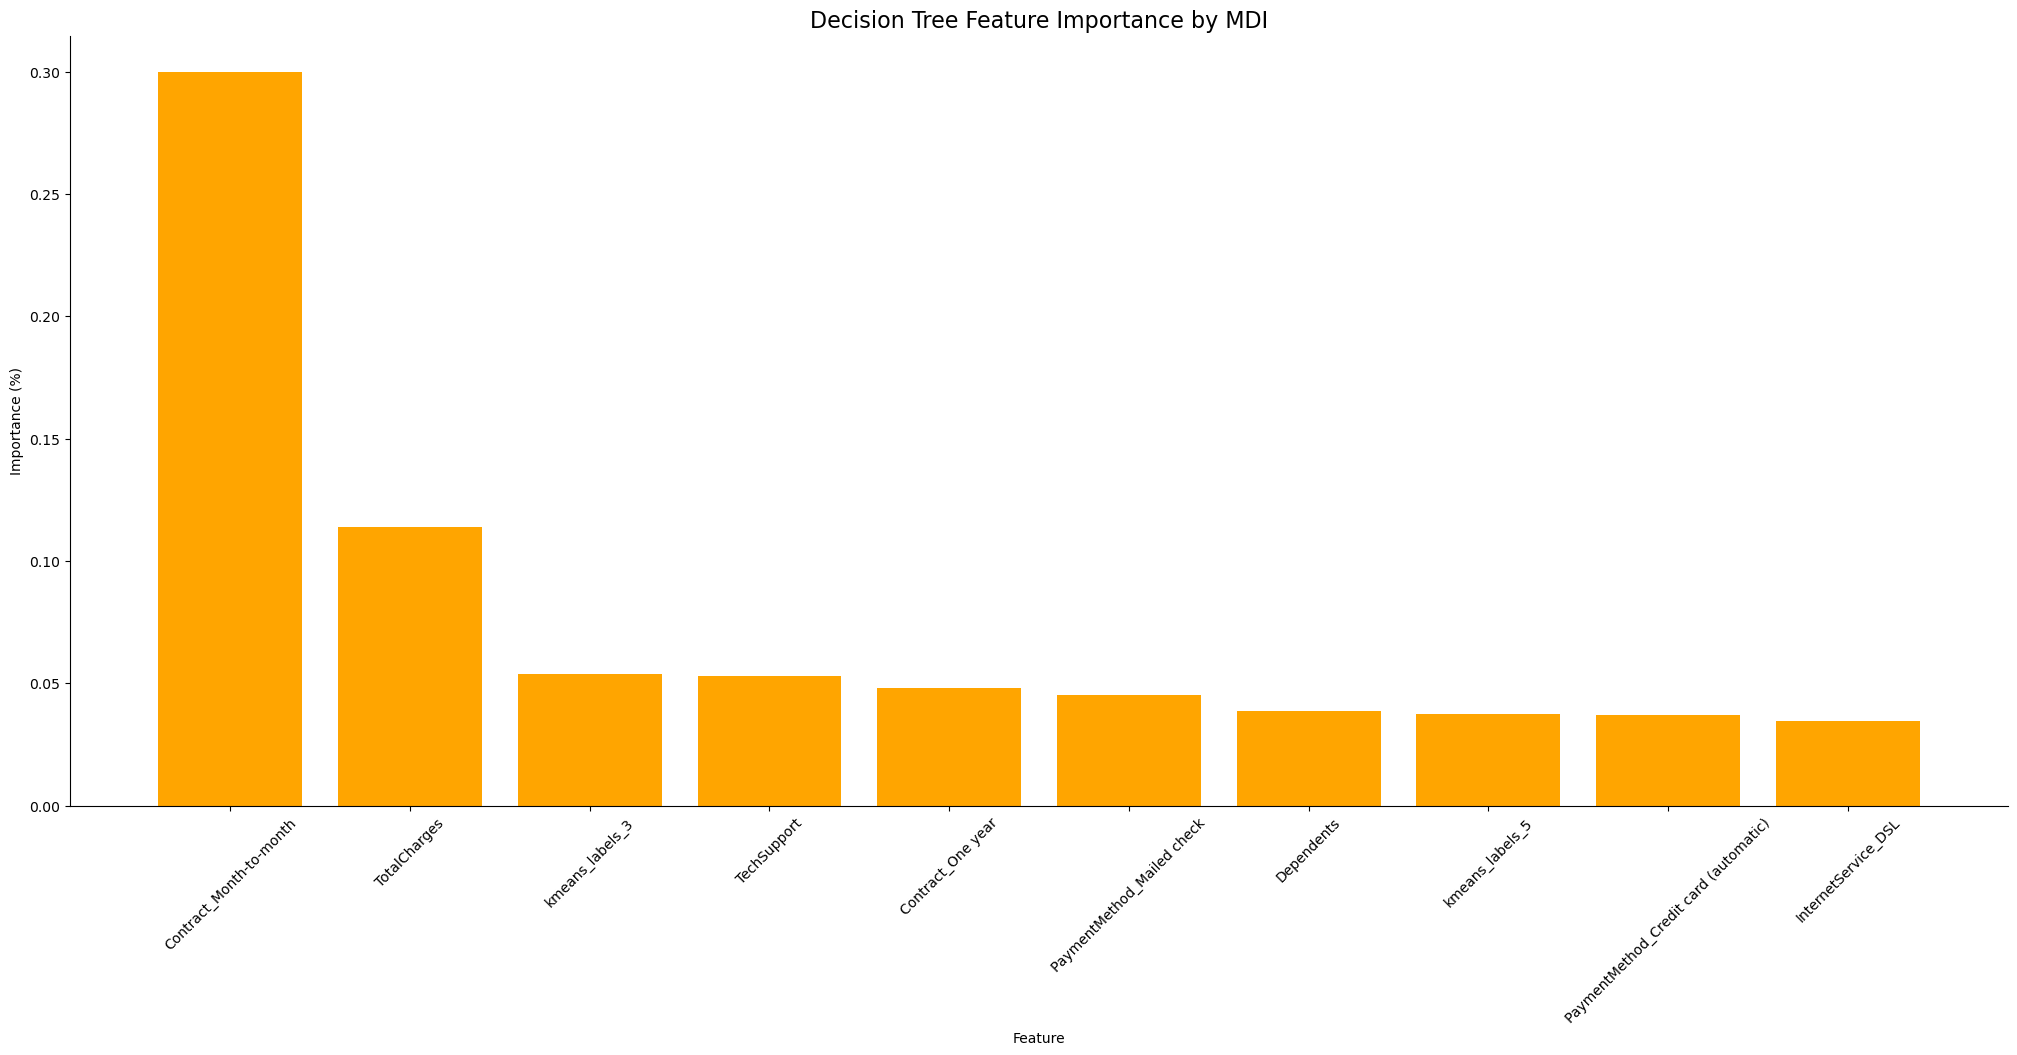

In [34]:
capstone_utils.decision_tree_feature_importance(dt_model,X_train)

The bar plot above displays the top 10 most important features chosen by the decision tree model. The features differ largely to the logistic model which is very interesting. Contract_two_year has appeared again with the highest value which could be explained by the fact that so many customers who have two year contracts do not churn at a very high rate which is a good indicator of churn. Also, it is interesting to see that the model chose the kmean_label_4 as opposed to 1 as a good identifier on whether a customer churns or not. In past models 1 was of higher importance but the decision tree has deemed that given the high churn behaviour in group 4 it is more important. Lastly, Total charges seems to be also of great importance which is expected but to see it further down the list than mailed check is worth noting.

### K-Nearest Neighbours

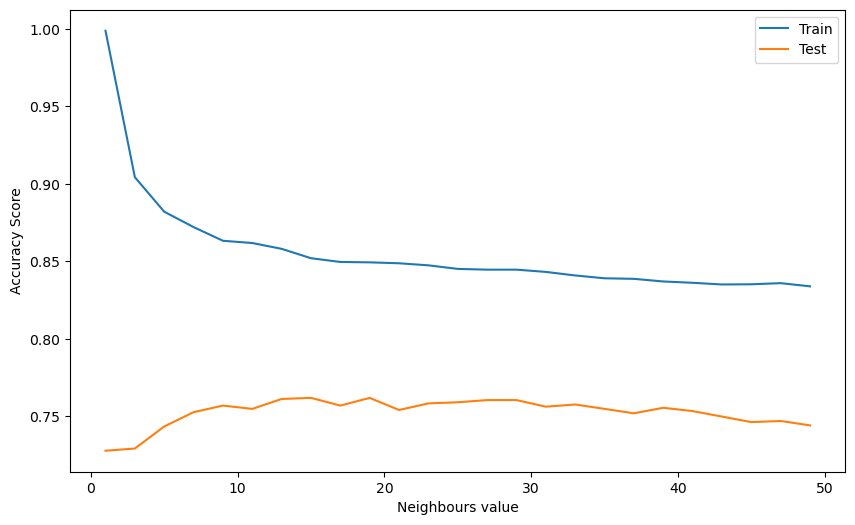

The neighbours value which yielded the highest test accuracy was: 15, I will input this in my final model:
Train score: 0.8520581113801453
Test score: 0.7619047619047619


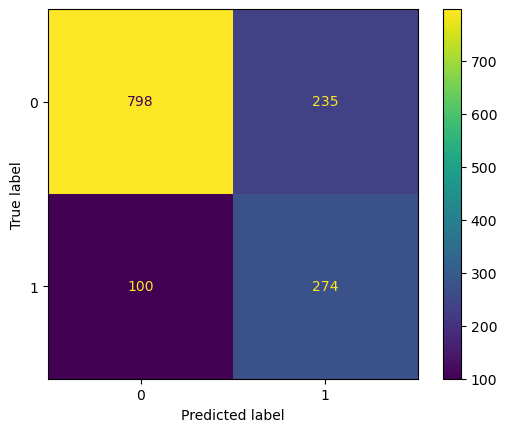

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1033
           1       0.54      0.73      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



In [35]:
knn = capstone_utils.plot_model_result('knearest', X_train_mm, X_test_mm, y_train, y_test)

Referring to the plot for the KNN model, there seems to be a large amount of overfitting to the training data which is having a detrimental effect on predicting. However, the recall score for class 0 is the highest so far, implying that there were a low number of false negatives predicted by the model.

The hyperparameters I want to tune in my KNN model are: 

n_neighbors - From the previous KNN model, I found that the neighbors value which produced the highest test accuracy score was 27. I chose a range around that number for the neighbors value in the pipeline. I chose two below and above that value to ensure I got a good range. 

weights - this function is used in the prediction of specific values with respect to the neighboring data points. Given that the default is that all the surrounding data points have equal weighting, I want to explore whether distance had an effect because from my clustering analysis I saw that the silhouette score was very low implying that the clusters were very close together and there wasn't much seperation. So these close data points may have a stronger effect on the prediction compared with further away data points. 

p - This refers to what distance metric would be used when predicting nearby points. Given the fact that the data points are very close together, I wanted to explore whether the differente distance metrics would have an effect on predicting certain data points. 

leaf_size - I decided to optimise the hyperparameter of leaf_size because I have the algorithm set to 'auto' which means that the model will determine whether to use kd_tree or ball_tree as the algorithm to predict data points. By determining a leaf size this ensures that my model what close neighbours to use when predicting data points. I decided to use a range between 1-50 because the default inputted in KNN is 30 and therefore I was able to accommodate for lower and upper limits. 

In [36]:
my_pipeline = Pipeline([('model', KNeighborsClassifier())], memory=cachedir)

knn_param_grid = [
    
    {'model': [KNeighborsClassifier()],
    'model__n_neighbors': [i for i in range(1,30)],
    'model__weights': ['uniform','distance'],
    'model__p': [1,2],
    'model__leaf_size': list(range(1,50,10))
    }
]

knn_gs = GridSearchCV(my_pipeline, param_grid=knn_param_grid, cv=5, verbose=2)
fitted_knn_gs = knn_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 580 candidates, totalling 2900 fits
[CV] END model=KNeighborsClassifier(), model__leaf_size=1, model__n_neighbors=1, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__leaf_size=1, model__n_neighbors=1, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__leaf_size=1, model__n_neighbors=1, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__leaf_size=1, model__n_neighbors=1, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__leaf_size=1, model__n_neighbors=1, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__leaf_size=1, model__n_neighbors=1, model__p=1, model__weights=distance; total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__leaf_size=1, model__n_neighbors=1, model__p=1, model__weights=distance; t

In [37]:
capstone_utils.print_scores(fitted_knn_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
The score for the test data :
0.7590618336886994
The best score from the cross validation fitting :
0.8328087167070217


I have bottomed out with my leaf size, given that I was increasing the leaf size in steps of 10 I want to see if I can tune this parameter further with another gridsearch demonstrated below. 

In [38]:
knn_model = fitted_knn_gs.best_estimator_[-1]

In [39]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', knn_model)], memory=cachedir)

knn_param_grid = [
    {'model': [knn_model],
    'model__leaf_size': [y for y in range(1,10,1)]
    }
]

knn_gs = GridSearchCV(my_pipeline, param_grid=knn_param_grid, cv=5, verbose=2)
fitted_knn_gs = knn_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1), model__leaf_size=1; total time=   0.2s
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1), model__leaf_size=1; total time=   0.2s
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1), model__leaf_size=1; total time=   0.2s
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1), model__leaf_size=1; total time=   0.2s
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1), model__leaf_size=1; total time=   0.2s
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1), model__leaf_size=2; total time=   0.2s
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1), model__leaf_size=2; total time=   0.2s
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors=12, p=1), model__leaf_size=2; total time=   0.2s
[CV] END model=KNeighborsClassifier(leaf_size=1, n_neighbors

In [40]:
capstone_utils.print_scores(fitted_knn_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
The score for the test data :
0.7590618336886994
The best score from the cross validation fitting :
0.8328087167070217


Looking at the best estimator, it is clear to see that the optimal leaf size is actually 1. This means that there's simply no tree at all (brute force), so all points are the candidates for the neighbours, as a result the algorithm is guaranteed to find the exact solution. I was not able to increase the score of the test accuracy by much. 

In [41]:
knn_model = fitted_knn_gs.best_estimator_[-1]

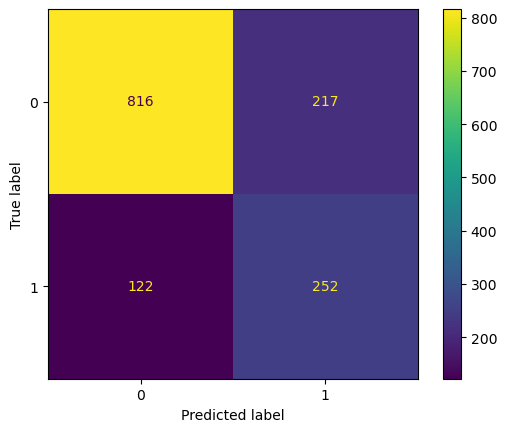

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407



In [42]:
capstone_utils.display_confusion_matrix(knn_model,X_test_mm,y_test)

Looking at the classification report of the final model the recall for class 1 fell by 5% but the other numbers remained the same. Given that this is a distance based prediction model the fact that there was a class imbalance in the test data definitely had a part to play in why the results came out slighlty worse for class 1. However, the average is one of the higher performing models. If I had more time I would like to have explored the number of neighbours range and also the min_samples_leaf range. Although increase the number of neighbours range would have been made the model prone to fitting it may have yielded some better results. However, given the computing time it took for this range I chose to keep it within this range. 

Furthermore, given that KNN uses distance for its prediction it is unable to produce a graph of feature importance to help determine which features are more important than others in its prediction methods.

### Random Forest Modelling

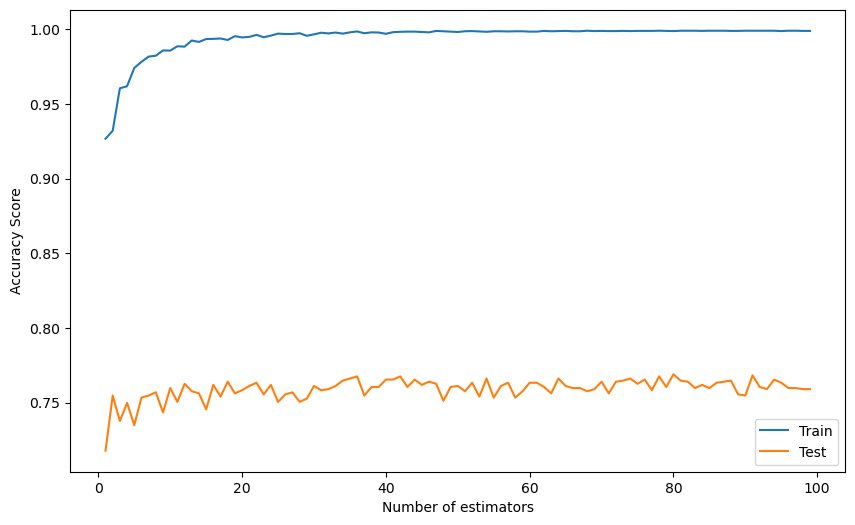

The number of trees which yielded the highest test accuracy was: 80, I will input this in my final model:
Train score: 0.998910411622276
Test score: 0.7626154939587776


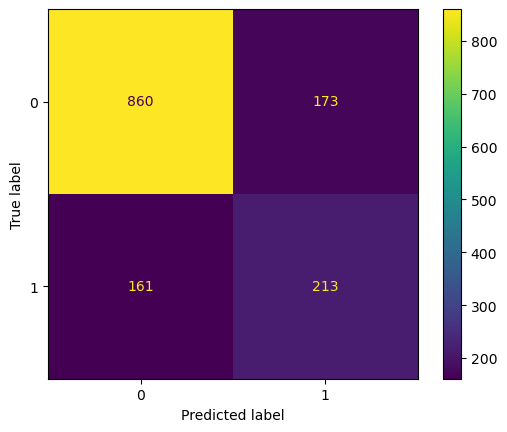

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.57      0.56       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.76      0.76      1407



In [43]:
myrandomforest = capstone_utils.plot_model_result('randomforest', X_train_mm, X_test_mm, y_train,y_test)

My baseline model for randomforest demonstrates that the model is overfitting to the data a lot. I want to reduce this as much as possible and increase the performance of this model. To do this, I have created a grid search below. 

From external [research](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) and referring to documentation the hyperparameters I have chosen to tune are: 

n_estimators - given that my baseline model had an optimal value around 54 I chose to use the range 50-90 to account for any changes in the optimal value in the estimator. Given that certain parameters will change within the gridsearch I decided to increase the range in case this would cause the optimal estimator value to be different. A higher value of estimators ensures that the model does not overfit and given that the default is 100 that also helped me in the decision making. 

criterion - reiterating my thinking used when creating the decision tree, I wanted to explore whether entropy would make a difference and increase the accuracy of my results or not. I assumed gini would perform better because my data was binary.

max_depth - I used data from the optimised decision tree model. Given that 13 was the optimal max depth I chose a range around that value to determine the most efficient model.  But also wanted a value large enough to encounter any changes in performance.

min_samples_leaf - I chose a massive range given that I have around 8000 samples, not all the data will be filtered down to 1 sample per leaf so I had to include a massive range. I chose up to 1000 with large steps to ensure that I wouldn't increase the run time of my models and slow down my computer. 

warm_start - In previous iterations of the random forest it took an incredibly long time to run the grid search. I wanted the model to reuse aspects of the model learnt from previous parameter values which would save time and ensure that the model performed much better.

max_features - As mentioned previously in the Decision tree model, by setting this parameter equal to 'log2' this ensured that the model took less time to run and there was less chance of overfitting.

In [44]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', RandomForestClassifier())], memory=cachedir)

rfs_param_grid = [
    {'model': [RandomForestClassifier(max_features = 'log2', warm_start = True,random_state = 1)],
    'model__n_estimators': [i for i in range(50,90,10)],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [i for i in range(1,50,10)],
    'model__min_samples_leaf': [y for y in range(1,1000,100)]
    }
]
rfs_gs = GridSearchCV(my_pipeline, param_grid=rfs_param_grid, cv=5, verbose=2)
fitted_rfs_gs = rfs_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] END model=RandomForestClassifier(max_features='log2', random_state=1, warm_start=True), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50; total time=   0.1s
[CV] END model=RandomForestClassifier(max_features='log2', random_state=1, warm_start=True), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50; total time=   0.1s
[CV] END model=RandomForestClassifier(max_features='log2', random_state=1, warm_start=True), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50; total time=   0.1s
[CV] END model=RandomForestClassifier(max_features='log2', random_state=1, warm_start=True), model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50; total time=   0.1s
[CV] END model=RandomForestClassifier(max_features='log2', random_state=1, warm_start=True), model__criterion=gi

In [45]:
rfs_model = fitted_rfs_gs.best_estimator_[-1]

In [46]:
capstone_utils.print_scores(fitted_rfs_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 80, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': True}
The score for the test data :
0.757640369580668
The best score from the cross validation fitting :
0.8398305084745761


The number of estimators was 60 so I wanted to increase the range around this number to determine the optimal value. Furthermore, I used this thought process with the min_samples_leaf variable and max depth as well. 

In [47]:
#This takes 25 mins to run
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', rfs_model)], memory=cachedir)

rfs_param_grid = [
    {'model': [rfs_model],
    'model__n_estimators': [y for y in range(58,70,1)],
    'model__max_depth':[i for i in range(10,20)],
    'model__min_samples_leaf':[i for i in range(1,100,10)]
    }
]

rfs_gs = GridSearchCV(my_pipeline, param_grid=rfs_param_grid, cv=5, verbose=2)
fitted_rfs_gs = rfs_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV] END model=RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=80,
                       random_state=1, warm_start=True), model__max_depth=10, model__min_samples_leaf=1, model__n_estimators=58; total time=   0.2s
[CV] END model=RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=80,
                       random_state=1, warm_start=True), model__max_depth=10, model__min_samples_leaf=1, model__n_estimators=58; total time=   0.2s
[CV] END model=RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=80,
                       random_state=1, warm_start=True), model__max_depth=10, model__min_samples_leaf=1, model__n_estimators=58; total time=   0.2s
[CV] END model=RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=80,
                       random_state=1, warm_start=True), model__max_depth=10, model__min_samples_leaf=1, model__n_estimators=58; to

In [48]:
rfs_model = fitted_rfs_gs.best_estimator_[-1]

In [49]:
capstone_utils.print_scores(fitted_rfs_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 65, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': True}
The score for the test data :
0.7555081734186212
The best score from the cross validation fitting :
0.8409200968523003


The grid search displayed a slight increase in the prediction ability of the test data by 0.1%. However, the range for the min samples leaf was still too large to determine the optimal value so I shall narrow down the range around this certain value.

In [50]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', rfs_model)], memory=cachedir)

rfs_param_grid = [
    {'model': [rfs_model],
    'model__min_samples_leaf':[i for i in range(1,10)]
    }
]

rfs_gs = GridSearchCV(my_pipeline, param_grid=rfs_param_grid, cv=5, verbose=2)
fitted_rfs_gs = rfs_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END model=RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=65,
                       random_state=1, warm_start=True), model__min_samples_leaf=1; total time=   0.2s
[CV] END model=RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=65,
                       random_state=1, warm_start=True), model__min_samples_leaf=1; total time=   0.2s
[CV] END model=RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=65,
                       random_state=1, warm_start=True), model__min_samples_leaf=1; total time=   0.2s
[CV] END model=RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=65,
                       random_state=1, warm_start=True), model__min_samples_leaf=1; total time=   0.2s
[CV] END model=RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=65,
                       random_state=1, warm_start=True), model__min_samples_le

In [51]:
capstone_utils.print_scores(fitted_rfs_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 65, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': True}
The score for the test data :
0.7555081734186212
The best score from the cross validation fitting :
0.8409200968523003


In [52]:
rfs_model = fitted_rfs_gs.best_estimator_[-1]

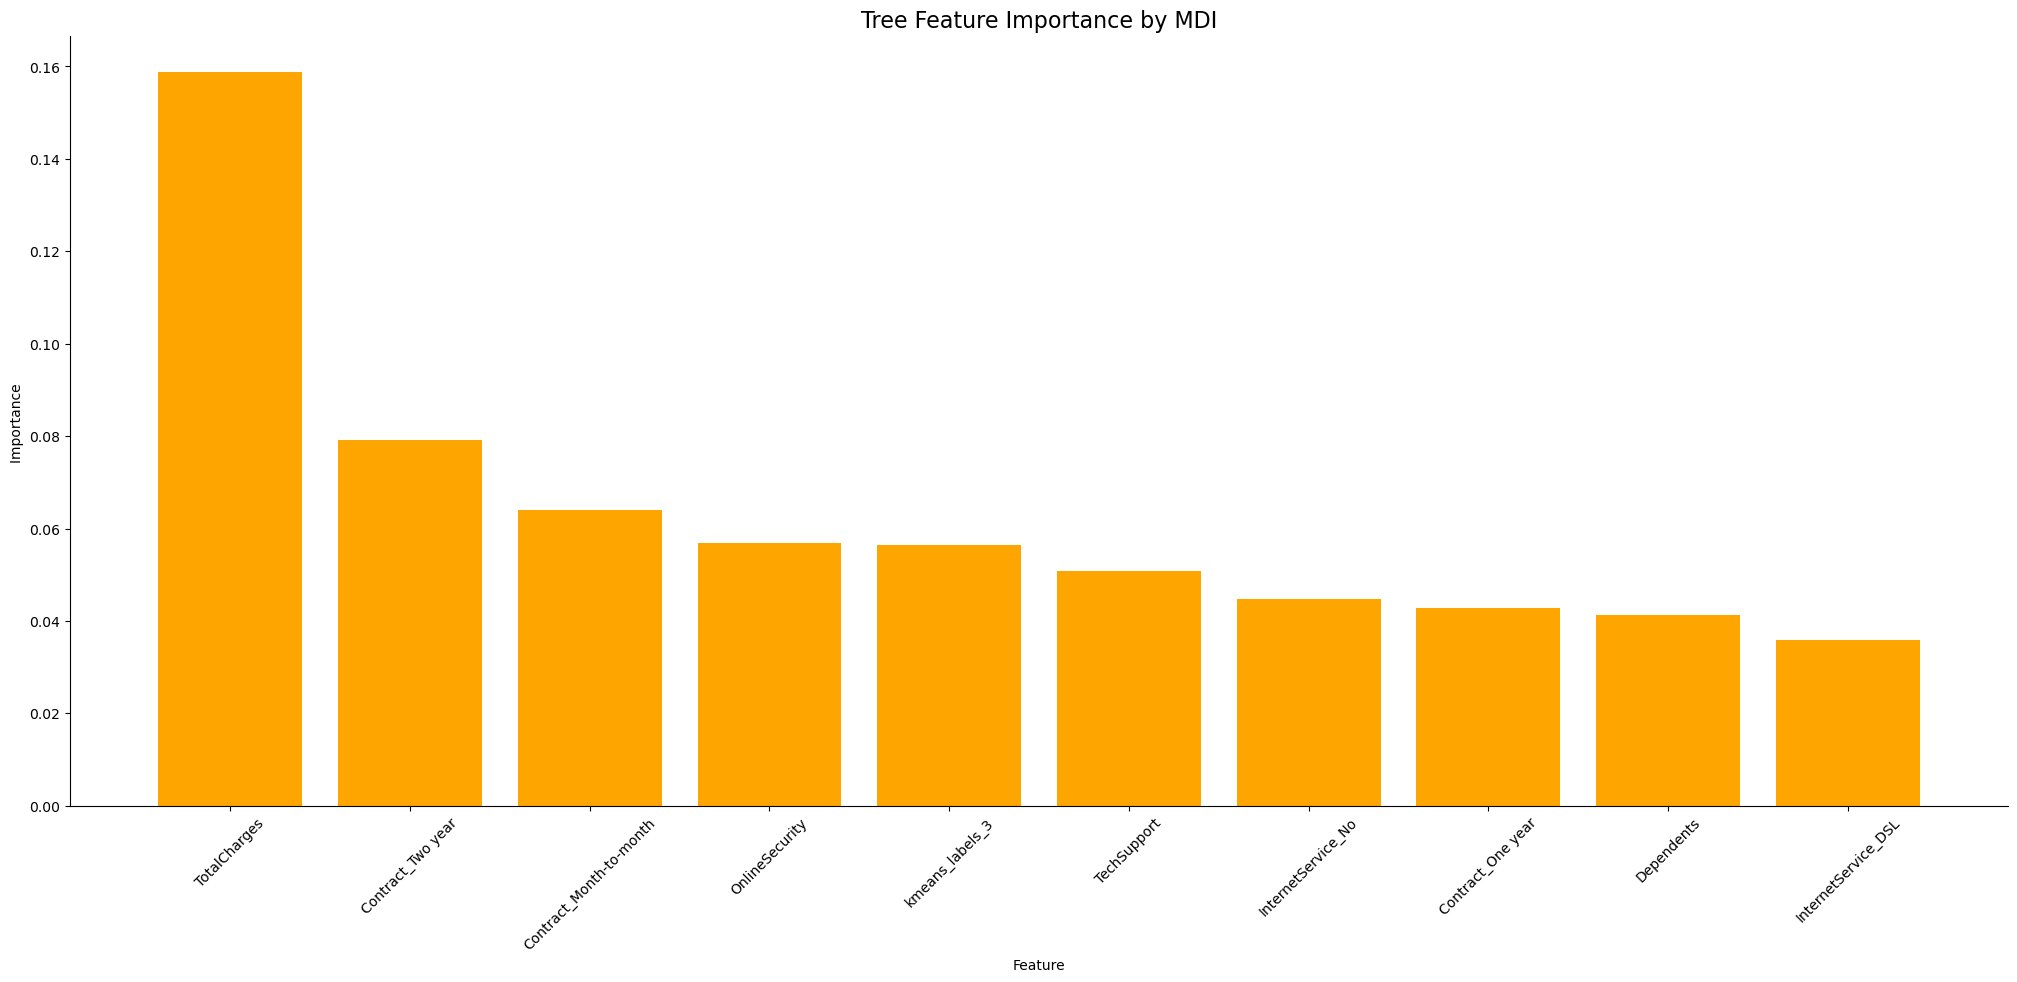

In [53]:
capstone_utils.ensemble_tree_feature_importance(rfs_model,X_train)

Studying the feature importance in the final optimised random forest model, it is quite interesting to see a difference from previous tree models. TotalCharges as expected is among the top 10 features of high importance - but it is interesting to see it at the top compared with other models who have valued it lower. However, to me it makes sense that the model has chosen it to be of such high importance because price is a massive reason why customers churn. Again, contract two year is second highest. There are a few others which have made an appearance before that wasn't previously there. DSL internet appearing in the top 10 is very interesting given the fact that customers who payed for DSL did not seem to exhibit much churn behaviour. But the model could see that as an indicator as to why a customer does not churn. 

Given that I have around 30 features, looking at the top 10 may seem a bit redundant as there are features which arent of much importance. However, by displaying the top 10 features I get a much more broader understanding of how the model is working and what information it is using to create prediction. 

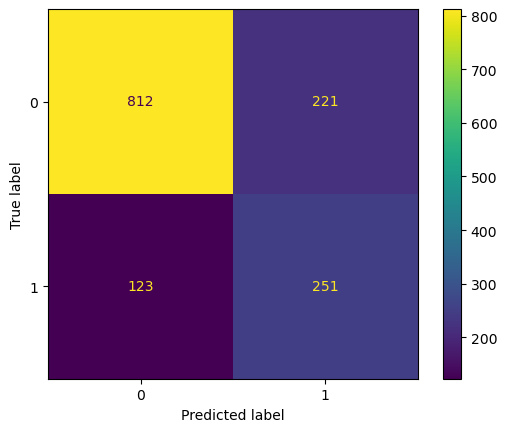

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.53      0.67      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.76      1407



In [54]:
capstone_utils.display_confusion_matrix(rfs_model, X_test_mm,y_test)

I was able to increase the score on the test data slightly more and increase the f1 score by 1% which is great. However, I feel that there was more I could have explored within the model. 

The next steps I would like to undertake are to explore whether min_impurity_decrease would have had an effect on the model. By default the value is 0 which means that all the items in that leaf are correctly classified. However, we do not live in a perfect world and that will not always be the case. By changing the values, this parameter stops a split if the amount of the decrease from the split is less than the entered impurity limit. I feel that the adoption of this parameter within my grid search may have led to an increase in accuracy, but the random forest model already took a long time and was computationally expensive. 

### Adaboost Classifier

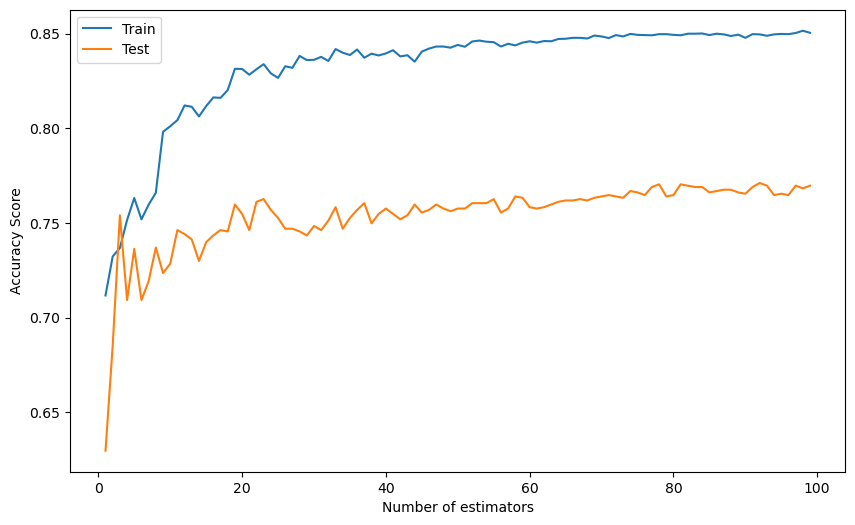

The number of trees which yielded the highest test accuracy was: 92, I will input this in my final model:
Train score: 0.849636803874092
Test score: 0.7711442786069652


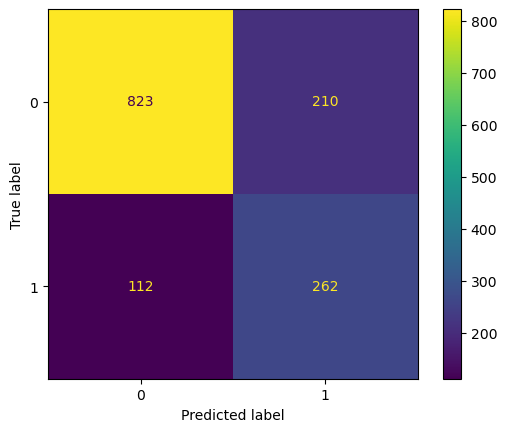

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1033
           1       0.56      0.70      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.77      0.78      1407



In [55]:
adaboost_model = capstone_utils.plot_model_result('adaboost', X_train_mm, X_test_mm, y_train,y_test)

Looking at classification report of the baseline adaboost model, the model has performed much better at predicting class 1 value compared with class 0 values. This can only be explained in the class imbalance in the test data. However, with class 0 scores, the recall and f1 score is so far the highest values produced by any model. However, the precision value for class 1 is lower than usual this is due to the fact that there are an increase in the number of false positives by the model.  

An Adaboost model uses an ensemble method building on the mistakes from the weak classifiers. Looking at previous models, both the Logistic regression and decision tree model performed well but there was much more space for improvement and better classifying. Adaboost takes advantage of this, by using the simplest version of both models 

Now I will tune the hyperparameters to see if I can optimise this value and increase the accuracy score. With the use of external [research](https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20) I have chosen these specific parameters to tune for my adaboost model: 

base_estimator - Initially, I had a RandomForest classifier as one of my base estimator models, however, this increased the computing time tenfold. Each model took 6 mins to run and as the number of estimators increased the time increased with it. I calculated that if I wanted to run cross validation with random forest it would have taken 1 day to fully run which was not feasible. Therefore, I stuck to the default base estimator which was a decision tree and logistic regression. This is the weak learner we want to use in the model, I chose these two for computational speed purposes and also because they are the weakest learners out of the models I have used. Adaboost work on the weak learners to correct the predictions made by the previous model. By default, the C value for a logistic regression is 1 which is what will be used for the base estimator. 

n_estimators - This is the number of base estimators I have chosen to use in my set, given that I have around 8000 samples I wanted to explore a wide range. Initially I chose 1000 but the run time stopped me from achieving any credible results. As a trade off between results and accuracy I decided to choose a value of 500. Which I will explore further after conducting the gridsearch. 

learning_rate - this values controls the loss function used for calculating the weight of the base models. Given that this value depends on the n_estimators values, I chose a range of which was very small for the learning rate as the n_estimators increased to very high values. When a weak classific has the chance of correctly predicting a value slightly more than random then the learning rate is 0.5, so I want to choose values lower than this to get much more accurate predictions. 

algorithm - I chose to use the SAMME.R algorithm for computational speed. SAMME.R uses the probability estimates to update the additive model, as a result the SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations. Furthermore,SAMME.R breaks after the error goes above 1/2 - with this reasoning in mind I chose to use SAMME.R.

In [56]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', AdaBoostClassifier())], memory=cachedir)

ada_param_grid = [
    
    {'model': [AdaBoostClassifier(algorithm = 'SAMME.R')],
    'model__base_estimator': [LogisticRegression(),DecisionTreeClassifier(max_depth = 1)],
    'model__n_estimators':[i for i in range(1,500,100)],
    'model__learning_rate': [0.1,0.01,0.001]
    }
]

ada_gs = GridSearchCV(my_pipeline, param_grid=ada_param_grid, cv=5, verbose=2)
fitted_ada_gs = ada_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END model=AdaBoostClassifier(), model__base_estimator=LogisticRegression(), model__learning_rate=0.1, model__n_estimators=1; total time=   0.0s
[CV] END model=AdaBoostClassifier(), model__base_estimator=LogisticRegression(), model__learning_rate=0.1, model__n_estimators=1; total time=   0.0s
[CV] END model=AdaBoostClassifier(), model__base_estimator=LogisticRegression(), model__learning_rate=0.1, model__n_estimators=1; total time=   0.0s
[CV] END model=AdaBoostClassifier(), model__base_estimator=LogisticRegression(), model__learning_rate=0.1, model__n_estimators=1; total time=   0.0s
[CV] END model=AdaBoostClassifier(), model__base_estimator=LogisticRegression(), model__learning_rate=0.1, model__n_estimators=1; total time=   0.0s
[CV] END model=AdaBoostClassifier(), model__base_estimator=LogisticRegression(), model__learning_rate=0.1, model__n_estimators=101; total time=   0.8s
[CV] END model=AdaBoostClassifier(), model

In [57]:
capstone_utils.print_scores(fitted_ada_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1, 'n_estimators': 401, 'random_state': None}
The score for the test data :
0.751954513148543
The best score from the cross validation fitting :
0.8285714285714286


I want to explore the n_estimators and learning rate further to see if I can obtain a much better score value because the value ranges are too large.

In [58]:
ada_model = fitted_ada_gs.best_estimator_[-1]

In [59]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', ada_model)], memory=cachedir)

ada_param_grid = [
    {'model': [ada_model],
    'model__n_estimators':[i for i in range(390,500,10)],
    'model__learning_rate': list(np.arange(0.1,0.9,0.1))
    }
]

ada_gs = GridSearchCV(my_pipeline, param_grid=ada_param_grid, cv=5, verbose=2)
fitted_ada_gs = ada_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=401), model__learning_rate=0.1, model__n_estimators=390; total time=   1.3s
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=401), model__learning_rate=0.1, model__n_estimators=390; total time=   1.3s
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=401), model__learning_rate=0.1, model__n_estimators=390; total time=   2.0s
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=401), model__learning_rate=0.1, model__n_estimators=390; total time=   2.7s
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),


In [60]:
capstone_utils.print_scores(fitted_ada_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.7000000000000001, 'n_estimators': 420, 'random_state': None}
The score for the test data :
0.7732764747690121
The best score from the cross validation fitting :
0.8375302663438257


In [61]:
ada_model = fitted_ada_gs.best_estimator_[-1]

Now that I was able to get the number of estimators down to smaller range I can do a final gridsearch to determine the best value for the number of estimators.

In [62]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', ada_model)], memory=cachedir)

ada_param_grid = [
    {'model': [ada_model],
    'model__n_estimators':[i for i in range(440,450,1)],
    }
]

ada_gs = GridSearchCV(my_pipeline, param_grid=ada_param_grid, cv=5, verbose=2)
fitted_ada_gs = ada_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.7000000000000001, n_estimators=420), model__n_estimators=440; total time=   1.5s
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.7000000000000001, n_estimators=420), model__n_estimators=440; total time=   1.5s
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.7000000000000001, n_estimators=420), model__n_estimators=440; total time=   1.5s
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.7000000000000001, n_estimators=420), model__n_estimators=440; total time=   1.5s
[CV] END model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.7000000000

In [63]:
capstone_utils.print_scores(fitted_ada_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.7000000000000001, 'n_estimators': 446, 'random_state': None}
The score for the test data :
0.7732764747690121
The best score from the cross validation fitting :
0.8376513317191282


In [64]:
ada_model = fitted_ada_gs.best_estimator_[-1]

Given that the base estimator which produced the highest accuracy scores in the adaboost algorithm was a decision tree, I can visualise the feature importance which the adaboost algorithm deemed important. 

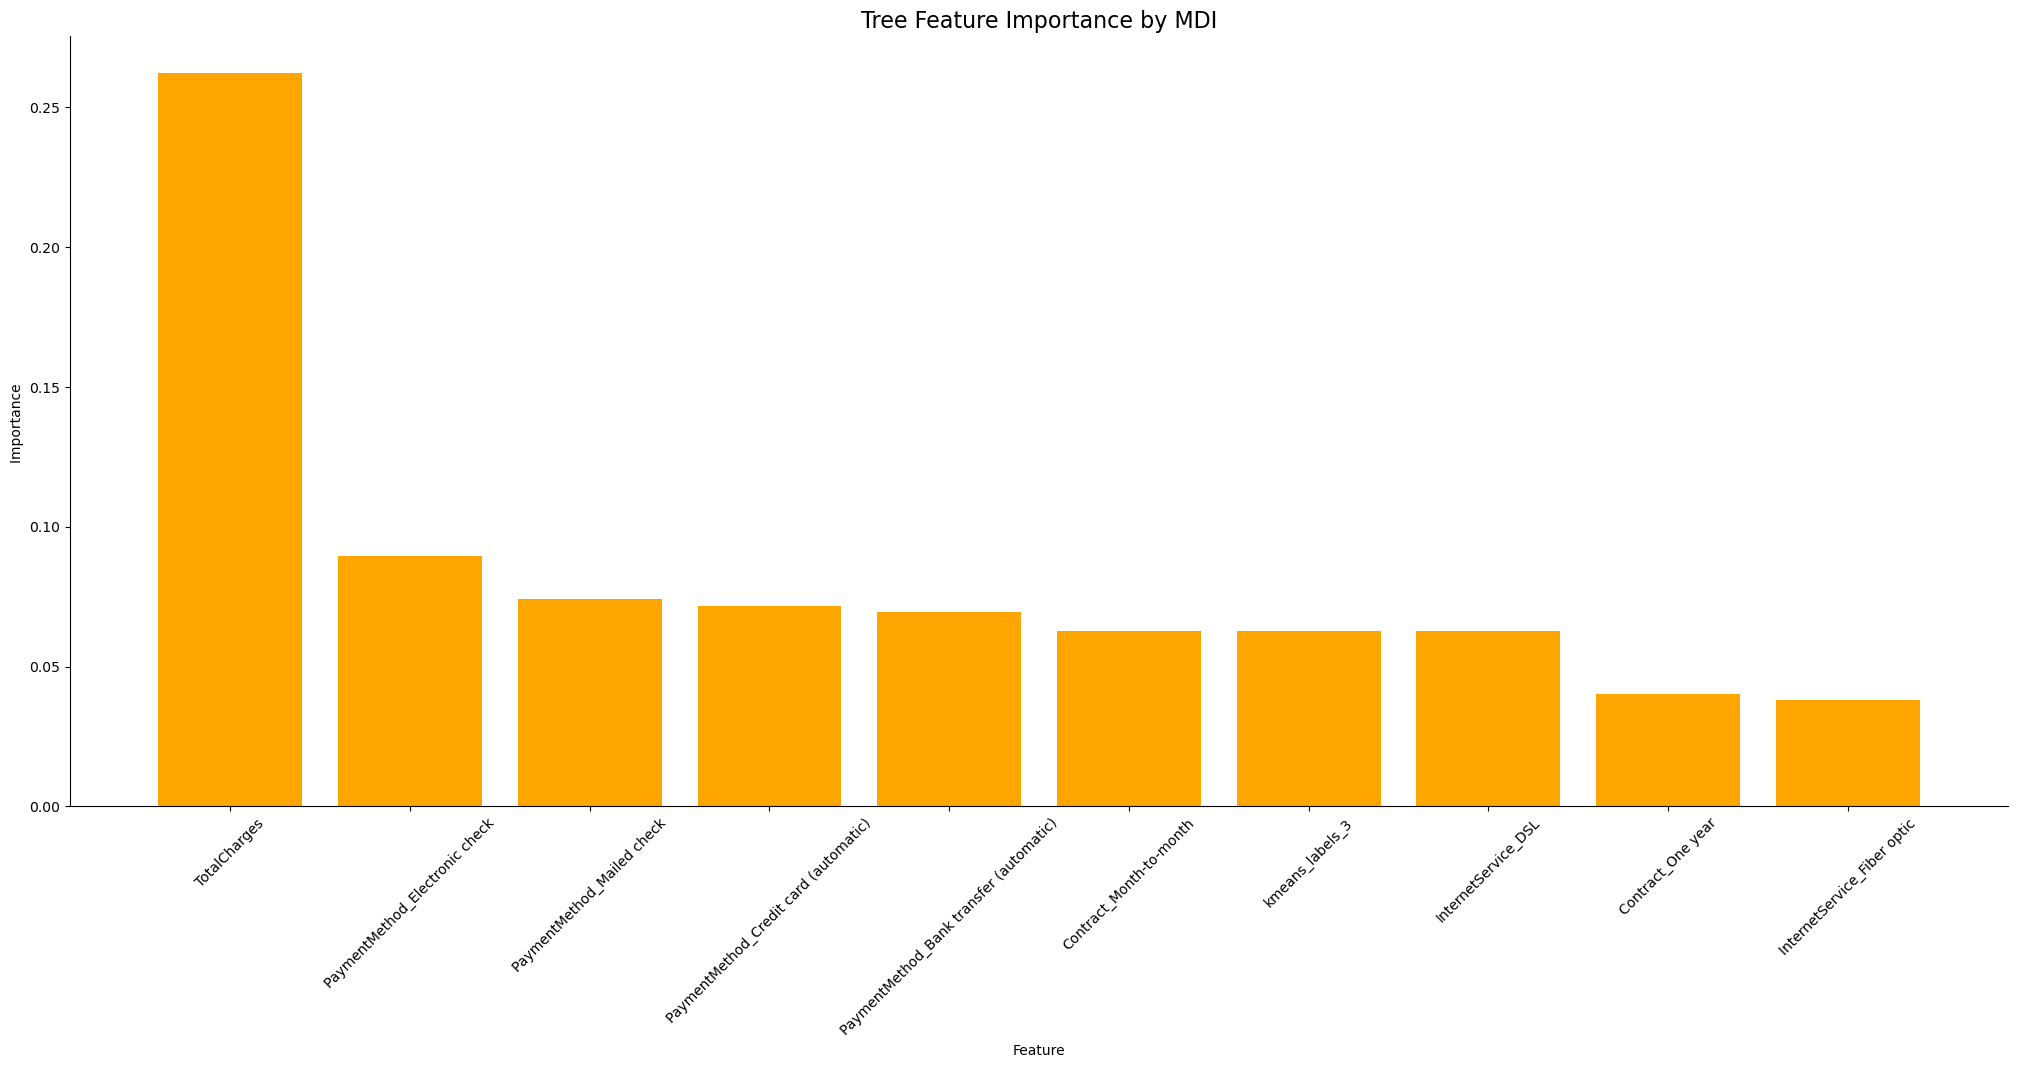

In [65]:
capstone_utils.ensemble_tree_feature_importance(ada_model,X_train)

The features that are deemed important to the random forest model are similar to what is deemed important by the adaboost classifier. Again totalcharges seems to have an effect on whether a customer churns which is expected and noted. However, it is  interesting to see three payment methods deemed highly important. During my EDA process I hadn't found a strong insight with mailed check that would cause a customer to churn or not. This could be the fact that customer who pay electronically are able to cut their contract short with ease compared with someone who mails their checks in as it is much longer process and a higher barrier for leaving. Lastly, the rest of the features that were deemed important by the model are incredibly insightful and similar to other models. There is no need to delve further into why they appear as they have been explained earlier. 

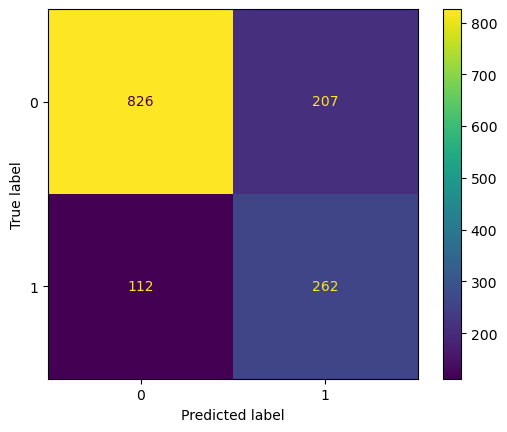

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1033
           1       0.56      0.70      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407



In [66]:
capstone_utils.display_confusion_matrix(ada_model, X_test_mm,y_test)

After the grid search I was able to get the accuracy score on the test data up to 77.7% which is so far the highest score on the test data I have been able to achieve. Both f1 scores for each class dropped by one percent due to an increase in the number of false positives for class 1 and increase false negatives for class 0. 

The nex steps I would like to undertake with this model are that I would like to explore more models to use as a base estimator, in previous iterations I included a random forest as a base estimator but when the number of estimators rose the run time to compute a fold dramatically increased. Given that a basic version of the model should be used in adaboost to build upon the mistakes of the weak classifier, I made sure that I made the random forest model have a max depth of 1. However, this was not enough - but with more time and computing resources I would like to explore that further as well as other models. 

### XGBOOST Classifier

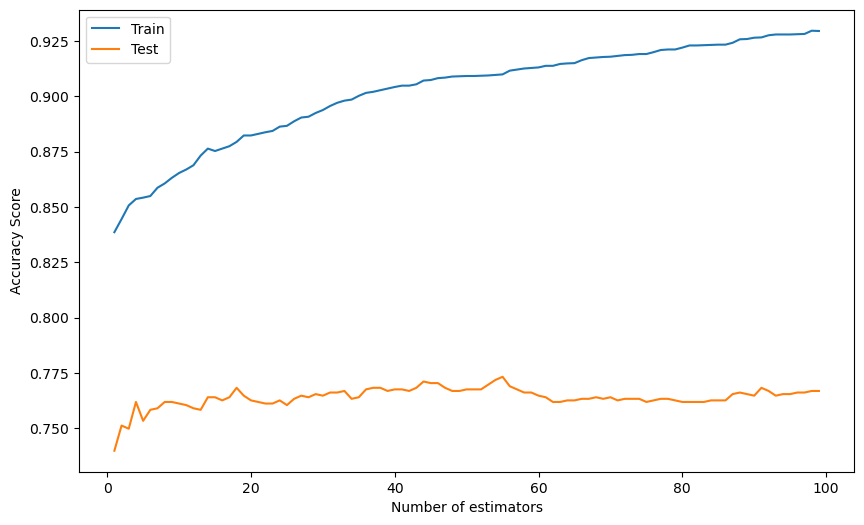

The number of trees which yielded the highest test accuracy was: 55, I will input this in my final model:
Train score: 0.9099273607748184
Test score: 0.7732764747690121


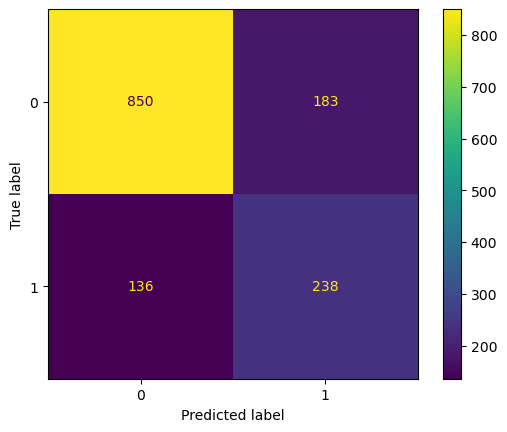

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.57      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



In [67]:
xgboost = capstone_utils.plot_model_result('xgboost',X_train_mm, X_test_mm, y_train,y_test)

Looking at the classification report of the baseline model for my xgboost model, there is definitely a large amount of overfitting to the train data which is demonstrated by the disparity between the test and train accuracy. Furthermore, the precision/recall/f1 score for class 1 is similar to other baseline models however, there are a high number of false positives for class 1 which is effecting the f1 score of the model and its ability to predict class 1 values. However, the score for the recall for class 1 is on the higher end demonstrating the lack of false negatives the model made for class 1. 

XGBoost minimises the loss function with the use of a gradient descent algorithm and at the heart of the model is a weak classifier in the form of a decision tree which builds on the mistakes made by the weak classifier. 

I want to hypertune the model to see if I can optimise the model output to increase the accuracy scores. I have chosen the following parameters to optimise with the help of external [research](https://towardsdatascience.com/a-guide-to-xgboost-hyperparameters-87980c7f44a9): 

n_estimators: This is the number of decision trees that will be boosted, with the default value for n_estimators being a 100 I chose a range of 1-300. I want to ensure that I chose a range of estimators that would ensure that the model does not overfit to the training data and also provides a high number of trees so that the model can handle all variances of the data. Furthermore, in previous iterations of this gridsearch I had a higher value of 1000 after reading this [article](https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e) which mentioned that if you have a medium-low amount data choose a higher value. However, this value ensured that the run time of the model was over an hour which I thought was inefficient so I lowered that value. 

max_depth: This was the max depth of every individual tree in the xgboost model. I chose values in this range because of previous models of both random forest and decision tree demonstrated the perfect balance between run time and accuracy of the model. I chose the step size of 10 so ensure that the gridsearch ran quick to provide a value which was efficient enough.

learning_rate: This again was a basic range of values to be able to determine which was the most optimal value. If your learning rate is set too low, training will progress very slowly as the model is making very tiny updates to the weights after each iteration. However, if the learning rate is set too high, it can cause undesirable divergent behavior in the loss function. So I chose values in this range which can then be narrowed down in further gridsearches. 

In [68]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', XGBClassifier())], memory=cachedir)

xgb_param_grid = [
    {'model': [XGBClassifier()],
    'model__n_estimators':[i for i in range(1,300,100)],
    'model__max_depth':[i for i in range(1,50,10)],
    'model__learning_rate': [0.1,0.01,0.001]
    }
]

xgb_gs = GridSearchCV(my_pipeline, param_grid=xgb_param_grid, cv=5, verbose=2)
fitted_xgb_gs = xgb_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), model__learning_rate=0.1, model__max_depth=1, model__n_estimators=1; total time=   0.0s
[CV] END model=XGBClassifier(base_score=None, booster=None, callbacks=None,
      

In [69]:
capstone_utils.print_scores(fitted_xgb_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 11, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 101, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
The score for the test data :
0.7619047619047619
The best score from the c

Again the ranges for the parameters are too large and need to be narrowed down to determine the most optimal parameter value. I chose large step sizes again because the computing time would have increased too much. Through multiple iterations of the grid search I can get a better view of what the most optimal parameter value is. 

In [70]:
xgb_model = fitted_xgb_gs.best_estimator_[-1]

In [71]:
#This takes 18 mins to run
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', xgb_model)], memory=cachedir)

xgb_param_grid = [
    {'model': [xgb_model],
    'model__n_estimators':[i for i in range(100,200,10)],
    'model__max_depth':[i for i in range(10,20,5)],
    'model__learning_rate': list(np.arange(0.1,0.2,0.02))
    }
]

xgb_gs = GridSearchCV(my_pipeline, param_grid=xgb_param_grid, cv=5, verbose=2)
fitted_xgb_gs = xgb_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END model=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=11, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=101, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...), model__learning_rate=0.1, model__max_depth=10, model__n_estimators=100; total time=   1.0s
[CV] END model=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample

In [72]:
capstone_utils.print_scores(fitted_xgb_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 10, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
The score for the test data :
0.7654584221748401
The best score from the c

In [73]:
xgb_model = fitted_xgb_gs.best_estimator_[-1]

In [74]:
cachedir = mkdtemp()
my_pipeline = Pipeline([('model', xgb_model)], memory=cachedir)

xgb_param_grid = [
    {'model': [xgb_model],
    'model__n_estimators':[i for i in range(100,110)],
    'model__max_depth':[i for i in range(10,15)],
    'model__learning_rate': list(np.arange(0.18,0.2,0.01))
    }
]

xgb_gs = GridSearchCV(my_pipeline, param_grid=xgb_param_grid, cv=5, verbose=2)
fitted_xgb_gs = xgb_gs.fit(X_train_mm, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END model=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...), model__learning_rate=0.18, model__max_depth=10, model__n_estimators=100; total time=   1.1s
[CV] END model=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsampl

In [75]:
xgb_model = fitted_xgb_gs.best_estimator_[-1]

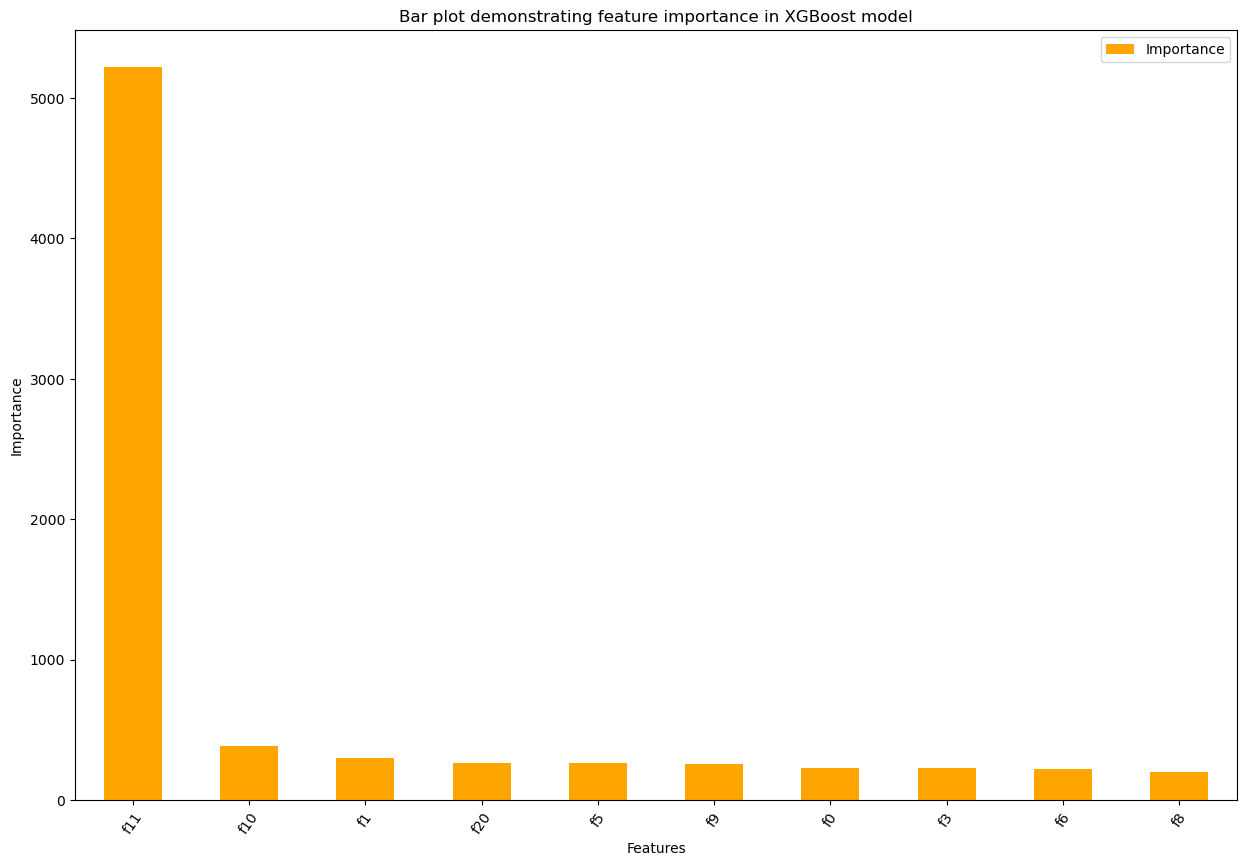

In [76]:
capstone_utils.xgboost_feature_importance(X_train,xgb_model)

With the help of two [stack](https://stackoverflow.com/questions/46943314/xgboost-plot-importance-doesnt-show-feature-names)[overflow](https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost) articles, I was able to find a way to plot the feature importance of the XGBoost model.

Looking at the plot again, it is clear that TotalCharges seems to be the feature with the most importance. However, to see if it have such a high importance that it dwarfs out other features is very surprising. It is also very interesting to see that there are features I did not expect to see such as SeniorCitizen and MultipleLines. However, given the fact that XGBoost builds off the mistakes made by weak classifiers it could help to explain why these features are so important.

In [77]:
capstone_utils.print_scores(fitted_xgb_gs,X_test_mm,y_test)

The parameters for the best estimator is: 
{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.18, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 10, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 107, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
The score for the test data :
0.7583511016346838
The best score from the 

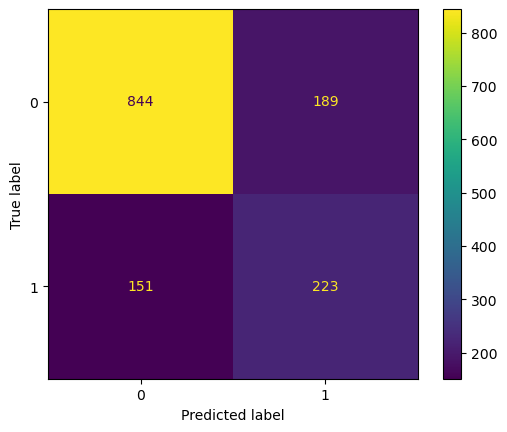

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1033
           1       0.54      0.60      0.57       374

    accuracy                           0.76      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.76      0.76      1407



In [78]:
capstone_utils.display_confusion_matrix(xgb_model, X_test_mm,y_test)

After gridsearch optimisation XGBoost model was able to maintain its f1 scores for both classes. However, the model I feel has overfitted to the training data and this has led to lower scores for the test. Although the f1 scores are similar to other models I felt that XGBoost would be able to able to perform better than other models and also at a quicker speed. Given it is an ensemble method similar to adaboost and given that is designed to combat bias in the data much more effectively - this was claimed in the XGBoost [documentation](https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html). Most of the parameters are designed to ensure that the bias is taken into account. 

The next steps for this model are that I would like to explore parameters that would control overfitting further, although I tuned the max depth parameters such as min_child_weight. These parameters claimed in the documentation will help to reduce overfitting. Furthermore, lowering the learning rate when conducting xgbost means that you have to increase the num_rounds parameter. This parameter controls the number of rounds for boosting which if I had more time I would like to explore

It should be mentioned that in previous iterations of the gridsearch, I found that using PCA not only increased the computing time dramatically, but after completing the gridsearch the most optimal model did not have a dimension reduction tool in the most optimal score. Therefore, I have reduced the PCA from all my gridsearch models as I saw this as unnecessary.

### Apriori Algorithm

Finally, I want to use the Apriori algorithm to mine the data for frequent itemsets and devise association rules from the database. I have decided to filter the dataframe to include the services provided by the Telco company and the Churn column. However, before I continue I want to define a few terms which I will refer to in this section:

- **support**: How often our items, or group of items occur in the dataset.
- **Confidence** is a measure of how much more likely one service will be paid for than another. It is calculated by dividing the support of our antecedent and consequent together by the support of our antecedent alone.
- **Lift**  How much we have _lifted_ the likelihood of the consequent (churn) by paying for the antecedent . A values of 1 represents no increase.
- **Leverage** is the difference in support of the larger group, than would be expected if the antecedent and consequent were independent.
- **Conviction** is a measure of the dependence of the consequent on the antecedent. 

First, I will filter the data. 

In [79]:
services = telco_df.iloc[:,3:16].copy()
services = services.drop(columns = ['TotalCharges'])
services.head(5)

MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0              0               0             1                 0            0   
1              0               1             0                 1            0   
2              0               1             1                 0            0   
3              0               1             0                 1            1   
4              0               0             0                 0            0   

   StreamingTV  StreamingMovies  PaperlessBilling  Churn  InternetService_DSL  \
0            0                0                 1      0                    1   
1            0                0                 0      0                    1   
2            0                0                 1      1                    1   
3            0                0                 0      0                    1   
4            0                0                 1      1                    0   

   InternetService_Fiber optic  InternetService_No  
0                            0                   0  
1                            0                   0  
2                            0                   0  
3                            0                   0  
4                            1                   0

In [80]:
x = apriori(services, min_support=0.02, use_colnames=True)
x.sort_values(by='support', ascending = False)

/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
7    0.592719                                 (PaperlessBilling)
10   0.440273                      (InternetService_Fiber optic)
0    0.421928                                    (MultipleLines)
6    0.388367                                  (StreamingMovies)
5    0.384386                                      (StreamingTV)
..        ...                                                ...
769  0.020193  (InternetService_Fiber optic, PaperlessBilling...
355  0.020193  (InternetService_Fiber optic, PaperlessBilling...
737  0.020051  (InternetService_Fiber optic, PaperlessBilling...
428  0.020051  (InternetService_Fiber optic, TechSupport, Str...
785  0.020051  (InternetService_Fiber optic, DeviceProtection...

[790 rows x 2 columns]

In [81]:
for i in x.tail(1)['itemsets']:
    print(i)

frozenset({'InternetService_Fiber optic', 'PaperlessBilling', 'DeviceProtection', 'TechSupport', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'MultipleLines'})


Looking at the dataframe above, paperlessbilling has the highest support demonstrating that customers opt for this service the most. Fiber optic is next wit the second highest support value which was demonstrated by the EDA value. On the other hand, the itsemsets which appear the least in baskets is 'OnlineBackup', 'StreamingMovies', 'TechSupport', 'InternetService_Fiber optic', 'StreamingTV', 'MultipleLines', 'DeviceProtection', 'PaperlessBilling' - which would be expected because this is all the services provided by Telco.

I now want to make Churn the consequent and see what confident and lift values are for the antecedents - to see what addition of services provided by Telco lead to a high churn rate. 

In [82]:
rules_df = association_rules(x,metric = 'lift', min_threshold=1)
rules_df = rules_df[rules_df.consequents == frozenset({'Churn'})]
rules_df.sort_values(by='confidence',ascending = False)

antecedents consequents  \
826     (InternetService_Fiber optic, PaperlessBilling)     (Churn)   
1995  (InternetService_Fiber optic, PaperlessBilling...     (Churn)   
86                        (InternetService_Fiber optic)     (Churn)   
3666  (StreamingTV, InternetService_Fiber optic, Pap...     (Churn)   
3680  (InternetService_Fiber optic, PaperlessBilling...     (Churn)   
...                                                 ...         ...   
1693  (DeviceProtection, PaperlessBilling, MultipleL...     (Churn)   
9100  (DeviceProtection, OnlineBackup, InternetServi...     (Churn)   
3420  (DeviceProtection, PaperlessBilling, Streaming...     (Churn)   
3370  (DeviceProtection, StreamingTV, PaperlessBilling)     (Churn)   
682                (DeviceProtection, PaperlessBilling)     (Churn)   

      antecedent support  consequent support   support  confidence      lift  \
826             0.340586            0.265785  0.151877    0.445929  1.677781   
1995            0.220137            0.265785  0.093714    0.425711  1.601710   
86              0.440273            0.265785  0.184443    0.418928  1.576190   
3666            0.199374            0.265785  0.082622    0.414408  1.559185   
3680            0.196388            0.265785  0.080916    0.412020  1.550201   
...                  ...                 ...       ...         ...       ...   
1693            0.136945            0.265785  0.037400    0.273105  1.027541   
9100            0.082480            0.265785  0.022327    0.270690  1.018454   
3420            0.159414            0.265785  0.042947    0.269402  1.013610   
3370            0.158419            0.265785  0.042662    0.269300  1.013224   
682             0.228100            0.265785  0.061291    0.268703  1.010980   

      leverage  conviction  
826   0.061355    1.325128  
1995  0.035205    1.278476  
86    0.067425    1.263552  
3666  0.029632    1.253800  
3680  0.028719    1.248708  
...        ...         ...  
1693  0.001002    1.010070  
9100  0.000405    1.006725  
3420  0.000577    1.004951  
3370  0.000557    1.004810  
682   0.000666    1.003991  

[71 rows x 9 columns]

Looking at the dataframe, sorting for the confidence values it can be seen that paperless billing and fiber optic are big indicators for churn as identified in the EDA process. It appears in nearly the top 10 entries which is expected. However, the confidence value needs to be taken with caution because it only accounts for how popular the antecedents are, but not consequents. If the consequents are also very popular in general, there will be a higher chance that a transaction containing items in the antecedent basket will also cause churn, thus inflating the confidence measure.

I will look into the lift as this will demonstrate the values better.

In [83]:
rules_df.sort_values(by='lift',ascending = False).head(10)

antecedents consequents  \
826      (InternetService_Fiber optic, PaperlessBilling)     (Churn)   
1995   (InternetService_Fiber optic, PaperlessBilling...     (Churn)   
86                         (InternetService_Fiber optic)     (Churn)   
3666   (StreamingTV, InternetService_Fiber optic, Pap...     (Churn)   
3680   (InternetService_Fiber optic, PaperlessBilling...     (Churn)   
6976   (InternetService_Fiber optic, PaperlessBilling...     (Churn)   
6946   (StreamingTV, InternetService_Fiber optic, Pap...     (Churn)   
14173  (InternetService_Fiber optic, PaperlessBilling...     (Churn)   
9938   (StreamingTV, InternetService_Fiber optic, Pap...     (Churn)   
303         (InternetService_Fiber optic, MultipleLines)     (Churn)   

       antecedent support  consequent support   support  confidence      lift  \
826              0.340586            0.265785  0.151877    0.445929  1.677781   
1995             0.220137            0.265785  0.093714    0.425711  1.601710   
86               0.440273            0.265785  0.184443    0.418928  1.576190   
3666             0.199374            0.265785  0.082622    0.414408  1.559185   
3680             0.196388            0.265785  0.080916    0.412020  1.550201   
6976             0.140216            0.265785  0.057736    0.411765  1.549240   
6946             0.141212            0.265785  0.056883    0.402820  1.515585   
14173            0.111206            0.265785  0.044226    0.397698  1.496316   
9938             0.150171            0.265785  0.059585    0.396780  1.492862   
303              0.275597            0.265785  0.109073    0.395769  1.489056   

       leverage  conviction  
826    0.061355    1.325128  
1995   0.035205    1.278476  
86     0.067425    1.263552  
3666   0.029632    1.253800  
3680   0.028719    1.248708  
6976   0.020469    1.248166  
6946   0.019351    1.229470  
14173  0.014670    1.219015  
9938   0.019672    1.217160  
303    0.035823    1.215123

Looking at the dataframe, sorting for the lift values with the addition of paperlessbilling and fiber optic service the lift is the highest and you raise the chance of churn by paying for these two services. The results are similar to the confidence values. However, what is interesting to see is that streamingMovies and MultipleLines are heavily connected into why customers churn. Although this was identified in Notebook 2 during the EDA process I did not expect to see these two services causing such a high churn behaviour. 

I want to look into what is helping customers to stay with the Telco Company. 

In [84]:
rules_df.sort_values(by='lift',ascending = False).tail(10)

antecedents consequents  \
9413   (OnlineBackup, StreamingTV, InternetService_Fi...     (Churn)   
5967   (OnlineBackup, InternetService_Fiber optic, St...     (Churn)   
6405   (DeviceProtection, StreamingTV, PaperlessBilli...     (Churn)   
13308  (InternetService_Fiber optic, OnlineBackup, St...     (Churn)   
9707   (DeviceProtection, StreamingTV, PaperlessBilli...     (Churn)   
1693   (DeviceProtection, PaperlessBilling, MultipleL...     (Churn)   
9100   (DeviceProtection, OnlineBackup, InternetServi...     (Churn)   
3420   (DeviceProtection, PaperlessBilling, Streaming...     (Churn)   
3370   (DeviceProtection, StreamingTV, PaperlessBilling)     (Churn)   
682                 (DeviceProtection, PaperlessBilling)     (Churn)   

       antecedent support  consequent support   support  confidence      lift  \
9413             0.099261            0.265785  0.027730    0.279370  1.051111   
5967             0.095563            0.265785  0.026593    0.278274  1.046988   
6405             0.104380            0.265785  0.029010    0.277929  1.045692   
13308            0.078356            0.265785  0.021758    0.277677  1.044743   
9707             0.129551            0.265785  0.035694    0.275521  1.036633   
1693             0.136945            0.265785  0.037400    0.273105  1.027541   
9100             0.082480            0.265785  0.022327    0.270690  1.018454   
3420             0.159414            0.265785  0.042947    0.269402  1.013610   
3370             0.158419            0.265785  0.042662    0.269300  1.013224   
682              0.228100            0.265785  0.061291    0.268703  1.010980   

       leverage  conviction  
9413   0.001348    1.018851  
5967   0.001193    1.017304  
6405   0.001268    1.016819  
13308  0.000932    1.016464  
9707   0.001261    1.013439  
1693   0.001002    1.010070  
9100   0.000405    1.006725  
3420   0.000577    1.004951  
3370   0.000557    1.004810  
682    0.000666    1.003991

Lift values that are close or near to 1 implies that there is very little connection between the consequents and the antecendents. Although this doesn't mean that having these services mean that customers do not churn it may be an indicator for the Telco company about what is helping to reatin customers. Furthermore, this combination of services in the basket could cause the churn to decrease, however, seperately these services may be cause a large amount of churn. 

However, looking at the antecendents Paperlessbilling appear at the bottom end of lift values as well and this can be explained by the high support demonstrated earlier - less importance will be placed on PaperlessBilling. DeviceProtection and Paperlessbilling in combination seem to cause less churn. Looking at other rows of the Antecedents the presence of Device Protection leads to less churn which could be taken from Telco that this service is an excellent service which leads to high customer satisfaction. This could be studied by the Telco company to determine how Device protection is such a good service. Furthermore, why Paperlessbillling is such a good service that had led to such a high support value. 

## Modelling Summary

 To conclude the table below visualises the scores for each final optimised model. Adaboost was the model which had the highest precision score, XGBoost had the highest recall score and both Logistic Regression and XGBoost had the highest F1 Score. All of these scores were related to class 1 which is to be expected given the class imbalance heavily in favour of class 1. However, looking at the highest scores for class 0, which, in my opinion may be more important given the low count of this class. Adaboost had the highest F1 score for the class 0 which is probably the best indicator for predicting class 0.

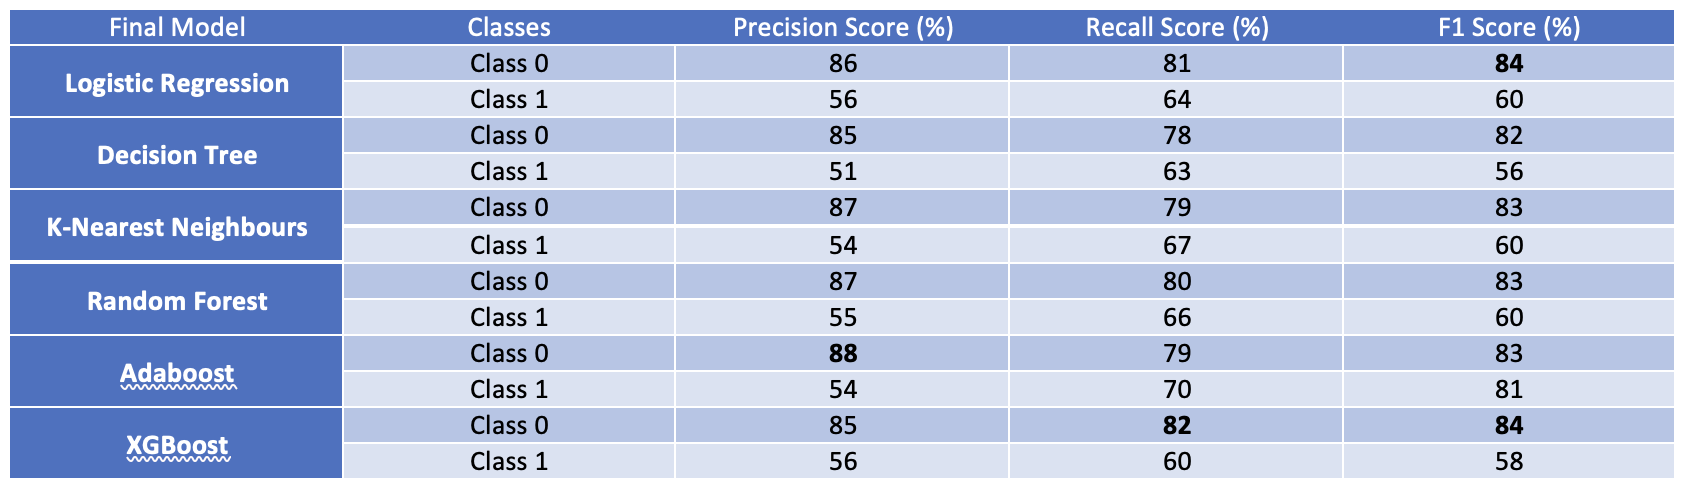

Looking at the table below, this shows how well the final cross validated model ran on the test data which is represented as the test score and the best score out all the cross validation models. Adaboost performs better on the test data but XGBoost has a slightly higher best score. 

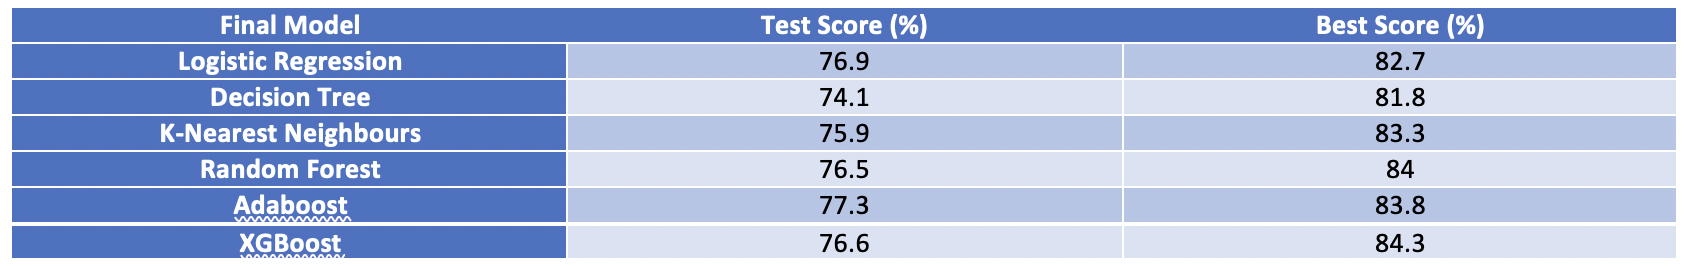

Preventing data leakage was also key when conducting these models. To ensure that my models were not gaining an advantage when predicting the test data I ensured that I never fit the models on the test data. I also ensure that there were no transformations applied to the test data directly - such as using SMOTE to balance the test data. This could also be said for scaling methods which are applied to the data. 

## Model Recommendations

Looking at the two tables above and the run time of these models, in future projects relating to customer churn and if I had more time - I would use an Adaboost classifier for this problem. It was a model which produced the highest f1 score which is an incredibly good metric to choose a model with - as f1 score measures how well at predicting values the model is. Furthermore, this is compounded by the fact that it produced the highest test score.

There are many more advantages I feel with using adaboost or a gradient boosting method, in that it strikes a strong balance between accuracy of predictions and computational speed. I was able to provide a larger range of parameters in which I wanted to explore and it was able to produce a result at a quick speed. As mentioned earlier there are other parameters I would have liked to have explored with Adaboost and I feel that this may have been able to increase the scores even more. 

## Actionable Insights

__Price is Power__

The price a customer pays for a service is paramount in whether they churn or not. This was identified early on in my project, however, many of the models deemed it TotalCharges column to be a valuable feature that would help determine whether a customer churned or not. For Telco if they were able to reduce the charges they were able to provide to the customer then this would be a valuable way for them to help retain their customers. 

__Product sets you apart__

The product you provide to your customers - in the case of Telco, a faster internet or more movies to choose from in the Streaming movies service they provide - will set you apart from your competitors. Certain models deemed that Fiber optic internet or DSL internet to be a very valuable feature to choose from. As identified earlier the speed of fiber optic may be slower than competitors which is why many customers who payed for fiber optic service decided to churn. Telco should look into ways they can provide quicker internet or delve further into how their product differs from their competitors to determine how they can create an advantage against rivals. 

__Family first__

Certain models deemed featues regarding the demographic of the customer to be highly important - such as Dependents or Partners. This is makes a lot of sense - customers who have children or in marriages on average are more risk adverse and less economically independent. Therefore, there is less chance of customers leaving the service, if Telco wants to retain customers then marketing to families will ensure that they have a better chance of keeping customer who are less likely to churn. 

__Long term customers__

What was consistent throughout most of the models when determining feature importance was that contract columns were regarded highly be it two year, one year or month to month. Identified during the EDA process and in the modelling process customers who were locked in for fixed term contract did not seem to churn compared with customers were on month to month contracts. This is to be expected as there are high costs that come with breaking a contract early and that is the same here. Furthermore, long term contracts provide a more consistent revenue stream - if Telco wants to help retain customers for the long run then getting more customers onto fixed term contracts as opposed to month to month contracts where customers are economically independent will help in customer retention. 

__Save the planet__ 

Whilst conducting the Apriori Algorithm what I found was that a massive percentage of customers who were paying for Telco services also opted for Paperless Billing. Now given the large amount of customers who opted for this service meant that there wasn't such concrete proof that this helped customers to churn or not - it is something worth noting and could represent a behaviour in customers. It could be said that a large portion of customer are climate focused and trying to help the environment. By marketing themselves as sustainably focused and instilling sustainable practices within the company it will help to create a stronger brand image that customers would like to stay with. 

__Would you like to pay with cash or card__

It has been consistent for nearly most models that the payment method which customers use to pay for their service is a strong indicator on whether a customer churns or not. Mailed check seems to be a very high indicator - moving customers to a digital form of paying may help to increase customer retention. Having to deal with customer checks means that the payment process gets drawn out as there are more steps in place for validating the check as opposed to digital methods of paying by credit card etc. This can also help customers with budgeting for their month if they are able to see how much money is coming out of their account each month. 



## Next Steps

As mentioned throughout this notebook, more time would allow me to optimise and investigate the models more:

Lower the overfitting - There was a high amount of overfitting demonstrated by all the models and I would like to explore ways I could help to reduce this to increase scores on the test data. 

Apply neural networks - Use neural networks to discover patterns in the data previously undiscovered by other models.

Optimise the model - Each model has other parameters I would have liked to explore further and broaden the range for the grid searches. 

Other models - I would have liked to look into other models to apply such as a simple gradient boosting model that could help provide a comparison to the current boosting models I have already. 